#PAINEL COVID GYN


```
painel-covid-goiania.herokuapp.com
github.com/wendelmarques/painel-covid-goiania
```



### Objetivo: Criar vizualizações com os dados sobre os casos confirmados da COVID-19 em Goiânia.

##### Os dados utilizados para geração do mapa e dos gráficos, foram retirados dos Informes Epidemiológicos publicados (em PDFs) pela Prefeitura de Goiânia, por meio de uma técnica chamada Data Scraping (algoritmos que realizam a tarefa de extração). São divulgadas apenas informações sobre alguns bairros - os que possuem mais casos confirmados acumulados, por isso, foram extraídos dados de 111 bairros.

#####Para mais informações, acesse: saude.goiania.go.gov.br


<br>
<br>

#### Fontes/ créditos

*    [Brasil.IO - O Brasil em dados libertos](https://brasil.io/dataset/covid19/caso/?search=&date=&state=&city=&place_type=&is_last=&city_ibge_code=5208707&order_for_place=)
*    [Plotly - Repositório](https://github.com/plotly/dash-sample-apps/tree/master/apps)
*   [How to create outstanding animated scatter maps with Plotly and Dash (Medium) - Lamothe Thibaud ](https://towardsdatascience.com/how-to-create-animated-scatter-maps-with-plotly-and-dash-f10bb82d357a)
*    [Deploying Dash or Flask web application on Heroku. Easy CI/CD (Medium) - Lamothe Thibaud](https://towardsdatascience.com/deploying-dash-or-flask-web-application-on-heroku-easy-ci-cd-4111da3170b8)
*    [Official Release of bar_chart_race (Medium) - Ted Petrou
dexplo.org/bar_chart_race](https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2)
*    [Gráfico de Corrida de Barras | Dica Pandas #7 - Programação Dinâmica (YouTube)](https://www.youtube.com/watch?v=rIwxjCnvdcY)
*    [Como utilizar a Google Geocoding API para obter endereços](https://www.devmedia.com.br/como-utilizar-a-google-geocoding-api-para-obter-enderecos/36751)
*    [Python Client for Google Maps Services](https://github.com/googlemaps/google-maps-services-python)
* [Como fazer um Web Scraping com Python](https://goomore.com/blog/web-scraping-python/)

* [Official Release of bar_chart_race](https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2)

* [Corrida de CASOS de COVID no Brasil | Gráfico de Corrida de Barras (Bar Chart Race) | Dica Pandas #7](https://www.youtube.com/watch?v=rIwxjCnvdcY)

* [ACESSANDO RECURSOS NA WEB COM PYTHON](https://pythonhelp.wordpress.com/2013/03/12/acessando-recursos-na-web-com-python/)

* [Como usar o R para escolher um lugar para morar (3) - Converter CEP em coordenadas geográficas](https://sillasgonzaga.github.io/2016-11-18-olx3/#:~:text=Obter%20endere%C3%A7o%20a%20partir%20do%20CEP&text=Sabemos%20que%20quanto%20mais%20dados,%2C%20bairro%2C%20cidade%20e%20estado.&text=%C3%89%20necess%C3%A1rio%20juntar%20todas%20as,de%20endere%C3%A7os%20em%20uma%20s%C3%B3)





---



Criado por Wendel Marques

*   [GitHub](https://www.github.com/WendelMarques)
*   [LinkedIn](https://www.linkedin.com/in/wendelmarques/)
*   [Medium](https://medium.com/@WendelMarques)


# Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Biblioteca e pacotes

In [5]:
import pandas as pd
import time
import bs4
import requests
from datetime import datetime
!pip install tika
from tika import parser
import numpy as np
import urllib.request #biblioteca usada para consultar uma URL
from bs4 import BeautifulSoup #funções BeautifulSoup para analisar os dados retornados do site
!pip install googlemaps
import googlemaps
import math
import numpy as np
!pip install bar_chart_race
!pip install ffmpeg
import bar_chart_race as bcr
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# #https://medium.com/dunder-data/bar-chart-race-python-package-official-release-78a420e182a2

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32884 sha256=26e5876823d8838155f529e733f4d588227e9921b3b0cfc8165467acacbcf911
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika
  Created wheel for googlemaps: filename=googlemaps-4.4.2-cp36-none-any.whl size=37858 sha256=d5253db00d63060db827e3a61fd374b9c543e253bac1a3c4f3424797516a1789
  Stored in directory: /root/.cache/pip/wheels/f4/21/41/0c84572e21d52bb322f6c299f38ac7cd8ad6d4d6ce23dc3631
Successfully built googlemaps
     |████████████████████████████████| 163kB 3.3MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=b8bd03da32eaf720fd99ee8af8d7a2f6b01d7ea501ae1199b00790a27475485f
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


#Data scraping - total de casos por bairro
`Extração de dados dos Informes Epidemiológicos (PDFs) publicados no site da Prefeitura de Goiânia`

In [6]:
#acessa a pagina de informes
siteInformes = "https://saude.goiania.go.gov.br/goiania-contra-o-coronavirus/informe-epidemiologico-covid-19/#antigos"
#Consulta o site e retorne o html para a variável 'page'
page = urllib.request.urlopen(siteInformes)
#Parse o html na variável 'page' e armazene-o no formato BeautifulSoup
soup = BeautifulSoup(page, 'html5lib')

In [7]:
#pecorre cada linha do html de siteInformes e pegar os links dos pdfs
all_links = soup.find_all('a')
urls_pdfs = []
for link in all_links:
    if link.get('href'):
        if link.get('href')[-3:] == 'pdf':
            urls_pdfs.append(link.get('href'))
            
urls_pdfs

['https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-168-17.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-167-16.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-166-15.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-165-14.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-162-11.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-161-10.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-160-09.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-159-08.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-158-07.09.2020-d.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no

In [8]:
len(urls_pdfs)

217

In [9]:
len(np.unique(urls_pdfs)) #deve ser igual ao numero de informes publicados - 2

166

In [10]:
#remove link duplicados
urls_pdfs = np.unique(urls_pdfs)

In [11]:
len(urls_pdfs)

166

In [12]:
#substitui alguns caracteres para evitar erros
urls_pdfs_modificadas = []
for url in urls_pdfs:
    new_link = url.replace('º', '%C2%BA')
    new_link1 = new_link.replace('padrão', 'padra%CC%83o')
    urls_pdfs_modificadas.append(new_link1)


i = 0
for i in range(len(urls_pdfs_modificadas)):
    print(i)
    print(urls_pdfs_modificadas[i])  

0
https://goiania.go.gov.br/sms/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-30-02.05.2020.pdf
1
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-1-03-04-2020.pdf
2
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-10-12.04.2020.pdf
3
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-11-13.04.2020.pdf
4
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-12-14.04.2020.pdf
5
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-13-15.04.2020-2.pdf
6
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-14-16.04.2020.pdf
7
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-15-17.04.2020_2.pdf
8
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-16-18.04.2020.pdf
9
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/In

In [15]:
###############################################################
######### OBJETIVO: LER O HTML E EXTRAIR OS DADOS #############
###############################################################

num_informes = len(urls_pdfs) #quantidades de informes publicados
i = 0
j = 0
conteudos = []
dataset = {}

def pega_data(url):
    indice = 0
    while indice < len(url):
        if url[indice] == '2':
            if url[indice+1] == '0':
                if url[indice+2] == '2':
                    if url[indice+3] == '0':
                        if url[indice+4] != '/':
                            data = url[indice] + url[indice+1]+url[indice+2]+url[indice+3]+'-'+url[indice-3]+url[indice-2]+'-'+url[indice-6]+url[indice-5]
                            # print(data)
                            return data
                
        
        indice+=1

    return '0000-00-00'        



def cria_lista_bairros_e_casos(bairro_casos):
    try:
        num_casos = bairro_casos.split(' ')[-1]
        num_casos = int(num_casos)
        qdt_dig_casos = int (math.log10 (num_casos))+2
        bairro = bairro_casos[:len(bairro_casos)-qdt_dig_casos]
        return [bairro, num_casos]

    except ValueError as e:
        return [0, 0]


for url in urls_pdfs_modificadas:

    if i <= num_informes:
        print(i)
        i+=1
        conteudos.clear()
        conteudos.append(parser.from_file(url))
        time.sleep(8)

        #armazena o conteudo do pdf em conteudos_pdfs.txt (um pdf por vez)
        #repare no conteudos.clear() linhas acima
        arquivo = open('conteudos-pdfs.txt', 'w')
        for linha in conteudos:
            arquivo.write(linha['content']) 
        arquivo.close()

        #pega a data do informe
        data = pega_data(url)
        data = data[:10]
        print(data)

        #abre o arquivo e captura a data em que foi criado
        arquivo = open('conteudos-pdfs.txt', 'r')
        lista = arquivo.readlines()
        arquivo.close()

        df = pd.DataFrame(lista)
        delete_row = df[df[0]=='\n'].index
        df = df.drop(delete_row)
        df.reset_index(inplace=True)
        df.drop(columns=['index'], axis=1, inplace=True)

        row_iterator = df.iterrows()

        while 1:
            try:
                for aux in range(len(df)):
                    linha_atual = next(row_iterator)
                    
                    if 'Setor Bueno' in linha_atual[1][0]:
                        while 1:
                            #cria um dicionario no formato bairro: num_casos
                            ret = cria_lista_bairros_e_casos(linha_atual[1][0])
                            if (ret[0] != 0 and ret[0] != 0):
                                dataset[j] = {'data': data, 'bairro': ret[0], 'num_casos': ret[1]}
                                j+=1
                            #"outros" é a flag usada para parar o loop
                            if 'Outros' in linha_atual[1][0]:                        
                                break  
                            linha_atual = next(row_iterator)            

            except StopIteration as e:
                    print(e)
                    break
    else:
        i+=1




2020-09-18 04:25:33,256 [MainThread  ] [INFO ]  Retrieving https://goiania.go.gov.br/sms/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-30-02.05.2020.pdf to /tmp/sms-wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-30-02.05.2020.pdf.


0


2020-09-18 04:25:44,324 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-1-03-04-2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-1-03-04-2020.pdf.


2020-05-02

1


2020-09-18 04:25:53,748 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-10-12.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-10-12.04.2020.pdf.


2020-04-03

2


2020-09-18 04:26:03,480 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-11-13.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-11-13.04.2020.pdf.


2020-04-12

3


2020-09-18 04:26:13,296 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-12-14.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-12-14.04.2020.pdf.


2020-04-13

4


2020-09-18 04:26:22,932 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-13-15.04.2020-2.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-13-15.04.2020-2.pdf.


2020-04-14

5


2020-09-18 04:26:32,546 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-14-16.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-14-16.04.2020.pdf.


2020-04-15

6


2020-09-18 04:26:42,515 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-15-17.04.2020_2.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-15-17.04.2020_2.pdf.


2020-04-16

7


2020-09-18 04:26:52,173 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-16-18.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-16-18.04.2020.pdf.


2020-04-17

8


2020-09-18 04:27:01,795 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-17-19.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-17-19.04.2020.pdf.


2020-04-18

9


2020-09-18 04:27:11,500 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-18-20.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-18-20.04.2020.pdf.


2020-04-19

10


2020-09-18 04:27:21,304 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-19-21.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-19-21.04.2020.pdf.


2020-04-20

11


2020-09-18 04:27:30,973 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-2-04.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-2-04.04.2020.pdf.


2020-04-21

12


2020-09-18 04:27:40,206 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-20-22.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-20-22.04.2020.pdf.


2020-04-04

13


2020-09-18 04:27:50,123 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-21-23.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-21-23.04.2020.pdf.


2020-04-22

14


2020-09-18 04:28:00,747 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-22-24.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-22-24.04.2020.pdf.


2020-04-23

15


2020-09-18 04:28:10,609 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-23-25.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-23-25.04.2020.pdf.


2020-04-24

16


2020-09-18 04:28:20,582 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-24-26.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-24-26.04.2020.pdf.


2020-04-25

17


2020-09-18 04:28:30,370 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-25-27.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-25-27.04.2020.pdf.


2020-04-26

18


2020-09-18 04:28:40,288 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-26-28.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-26-28.04.2020.pdf.


2020-04-27

19


2020-09-18 04:28:49,959 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-27-29.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-27-29.04.2020.pdf.


2020-04-28

20


2020-09-18 04:28:59,774 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-28-30.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-28-30.04.2020.pdf.


2020-04-29

21


2020-09-18 04:29:09,406 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-3-05.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-3-05.04.2020.pdf.


2020-04-30

22


2020-09-18 04:29:18,683 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-4-06.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-4-06.04.2020.pdf.


2020-04-05

23


2020-09-18 04:29:28,142 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-5-07.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-5-07.04.2020.pdf.


2020-04-06

24


2020-09-18 04:29:37,809 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-6-08.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-6-08.04.2020.pdf.


2020-04-07

25


2020-09-18 04:29:47,360 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-7-09.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-7-09.04.2020.pdf.


2020-04-08

26


2020-09-18 04:29:56,904 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-8-10.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-8-10.04.2020.pdf.


2020-04-09

27


2020-09-18 04:30:06,608 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-9-11.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-9-11.04.2020.pdf.


2020-04-10

28


2020-09-18 04:30:16,007 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-31-03.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-31-03.05.2020.pdf.


2020-04-11

29


2020-09-18 04:30:26,635 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-39-11.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-39-11.05.2020.pdf.


2020-05-03

30


2020-09-18 04:30:36,306 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-44-16.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-44-16.05.2020.pdf.


2020-05-11

31


2020-09-18 04:30:45,935 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-45-17.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-45-17.05.2020.pdf.


2020-05-16

32


2020-09-18 04:30:55,566 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-46-18.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-46-18.05.2020.pdf.


2020-05-17

33


2020-09-18 04:31:05,413 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-49-21.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-49-21.05.2020.pdf.


2020-05-18

34


2020-09-18 04:31:14,922 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-29-01.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-29-01.05.2020.pdf.


2020-05-21

35


2020-09-18 04:31:24,211 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-32-04.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-32-04.05.2020.pdf.


2020-05-01

36


2020-09-18 04:31:34,002 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-33-05.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-33-05.05.2020.pdf.


2020-05-04

37


2020-09-18 04:31:43,837 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-34-06.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-34-06.05.2020.pdf.


2020-05-05

38


2020-09-18 04:31:53,485 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-35-07.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-35-07.05.2020.pdf.


2020-05-06

39


2020-09-18 04:32:03,282 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-36-08.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-36-08.05.2020.pdf.


2020-05-07

40


2020-09-18 04:32:13,073 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-37-09.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-37-09.05.2020.pdf.


2020-05-08

41


2020-09-18 04:32:22,608 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-38-10.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-38-10.05.2020.pdf.


2020-05-09

42


2020-09-18 04:32:32,529 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-40-12.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-40-12.05.2020.pdf.


2020-05-10

43


2020-09-18 04:32:42,383 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-41-13.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-41-13.05.2020.pdf.


2020-05-12

44


2020-09-18 04:32:52,198 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-42-14.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-42-14.05.2020-1.pdf.


2020-05-13

45


2020-09-18 04:33:01,993 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-43-15.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-43-15.05.2020.pdf.


2020-05-14

46


2020-09-18 04:33:11,625 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-47-19.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-47-19.05.2020.pdf.


2020-05-15

47


2020-09-18 04:33:22,488 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-48-20.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-48-20.05.2020.pdf.


2020-05-19

48


2020-09-18 04:33:32,324 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-50-22.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-50-22.05.2020.pdf.


2020-05-20

49


2020-09-18 04:33:43,310 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-51-23-05-2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-51-23-05-2020.pdf.


2020-05-22

50


2020-09-18 04:33:53,166 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-52-24-05-2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-52-24-05-2020.pdf.


2020-05-23

51


2020-09-18 04:34:03,039 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-53-25.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-53-25.05.2020-1.pdf.


2020-05-24

52


2020-09-18 04:34:12,729 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-54-26.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-54-26.05.2020-1.pdf.


2020-05-25

53


2020-09-18 04:34:22,519 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-55-27.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-55-27.05.2020.pdf.


2020-05-26

54


2020-09-18 04:34:32,344 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-56-28.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-56-28.05.2020.pdf.


2020-05-27

55


2020-09-18 04:34:41,995 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-57-29.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-57-29.05.2020.pdf.


2020-05-28

56


2020-09-18 04:34:52,105 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-58-30.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-58-30.05.2020.pdf.


2020-05-29

57


2020-09-18 04:35:01,965 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-59-31.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-59-31.05.2020.pdf.


2020-05-30

58


2020-09-18 04:35:11,962 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-60-01.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-60-01.06.2020.pdf.


2020-05-31

59


2020-09-18 04:35:21,824 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-61-02.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-61-02.06.2020-1.pdf.


2020-06-01

60


2020-09-18 04:35:31,685 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-62-03.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-62-03.06.2020-1.pdf.


2020-06-02

61


2020-09-18 04:35:41,580 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-63-04.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-63-04.06.2020.pdf.


2020-06-03

62


2020-09-18 04:35:51,670 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-64-05.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-64-05.06.2020.pdf.


2020-06-04

63


2020-09-18 04:36:01,686 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-65-06.06.2020-.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-65-06.06.2020-.pdf.


2020-06-05

64


2020-09-18 04:36:11,463 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-66-07.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-66-07.06.2020.pdf.


2020-06-06

65


2020-09-18 04:36:21,457 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-67-08.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-67-08.06.2020.pdf.


2020-06-07

66


2020-09-18 04:36:31,749 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-68-09.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-68-09.06.2020.pdf.


2020-06-08

67


2020-09-18 04:36:41,719 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-69-10.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-69-10.06.2020.pdf.


2020-06-09

68


2020-09-18 04:36:51,705 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-70-11.06.2020-C.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-70-11.06.2020-c.pdf.


2020-06-10

69


2020-09-18 04:37:01,527 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-71-12.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-71-12.06.2020.pdf.


2020-06-11

70


2020-09-18 04:37:11,358 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-72-13.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-72-13.06.2020.pdf.


2020-06-12

71


2020-09-18 04:37:21,164 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-73-14.06.2020-modelo.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-73-14.06.2020-modelo.pdf.


2020-06-13

72


2020-09-18 04:37:32,983 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-74-15.06.2020-D4.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-74-15.06.2020-d4.pdf.


2020-06-14

73


2020-09-18 04:37:43,972 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-75-16.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-75-16.06.2020.pdf.


2020-06-15

74


2020-09-18 04:37:53,989 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-76-17.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-76-17.06.2020-1.pdf.


2020-06-16

75


2020-09-18 04:38:03,992 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-77-18.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-77-18.06.2020.pdf.


2020-06-17

76


2020-09-18 04:38:13,848 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-78-19.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-78-19.06.2020.pdf.


2020-06-18

77


2020-09-18 04:38:23,463 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-79-20.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-79-20.06.2020.pdf.


2020-06-19

78


2020-09-18 04:38:34,441 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-80-21.06.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-80-21.06.2020-padra-cc-83o.pdf.


2020-06-20

79


2020-09-18 04:38:44,376 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-81-22.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-81-22.06.2020.pdf.


2020-06-21

80


2020-09-18 04:38:54,386 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-82-23.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-82-23.06.2020.pdf.


2020-06-22

81


2020-09-18 04:39:04,331 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-83-24.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-83-24.06.2020.pdf.


2020-06-23

82


2020-09-18 04:39:14,136 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-84-25.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-84-25.06.2020.pdf.


2020-06-24

83


2020-09-18 04:39:24,084 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-85-26.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-85-26.06.2020.pdf.


2020-06-25

84


2020-09-18 04:39:34,076 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-86-27.06.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-86-27.06.2020-padra-cc-83o.pdf.


2020-06-26

85


2020-09-18 04:39:45,052 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-87-28.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-87-28.06.2020.pdf.


2020-06-27

86


2020-09-18 04:39:54,830 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-88-29.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-88-29.06.2020.pdf.


2020-06-28

87


2020-09-18 04:40:04,675 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-89-30.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-89-30.06.2020.pdf.


2020-06-29

88


2020-09-18 04:40:14,689 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-100-11.07.2020-padra%CC%83o-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-100-11.07.2020-padra-cc-83o-1.pdf.


2020-06-30

89


2020-09-18 04:40:25,820 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-101-12.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-101-12.07.2020-1.pdf.


2020-07-11

90


2020-09-18 04:40:37,048 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-102-13.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-102-13.07.2020.pdf.


2020-07-12

91


2020-09-18 04:40:46,997 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-103-14.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-103-14.07.2020.pdf.


2020-07-13

92


2020-09-18 04:40:56,955 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-104-15.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-104-15.07.2020.pdf.


2020-07-14

93


2020-09-18 04:41:06,791 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-105-16.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-105-16.07.2020.pdf.


2020-07-15

94


2020-09-18 04:41:16,629 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-106-17.07.2020-b.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-106-17.07.2020-b.pdf.


2020-07-16

95


2020-09-18 04:41:26,307 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-107-18.07.2020-b.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-107-18.07.2020-b.pdf.


2020-07-17

96


2020-09-18 04:41:36,268 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-108-19.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-108-19.07.2020-c.pdf.


2020-07-18

97


2020-09-18 04:41:46,092 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-109-20.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-109-20.07.2020-c.pdf.


2020-07-19

98


2020-09-18 04:41:56,059 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-110-21.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-110-21.07.2020.pdf.


2020-07-20

99


2020-09-18 04:42:06,118 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-111-22.07.2020d.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-111-22.07.2020d.pdf.


2020-07-21

100


2020-09-18 04:42:16,100 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-112-23.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-112-23.07.2020.pdf.


2020-07-22

101


2020-09-18 04:42:25,735 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-113-24.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-113-24.07.2020.pdf.


2020-07-23

102


2020-09-18 04:42:35,564 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-114-25.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-114-25.07.2020.pdf.


2020-07-24

103


2020-09-18 04:42:46,552 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-115-26.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-115-26.07.2020-c.pdf.


2020-07-25

104


2020-09-18 04:42:59,581 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-116-27.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-116-27.07.2020.pdf.


2020-07-26

105


2020-09-18 04:43:09,220 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-117-28.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-117-28.07.2020.pdf.


2020-07-27

106


2020-09-18 04:43:19,201 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-118-29.07.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-118-29.07.2020-d.pdf.


2020-07-28

107


2020-09-18 04:43:29,187 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-119-30.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-119-30.07.2020-1.pdf.


2020-07-29

108


2020-09-18 04:43:38,837 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-120-31.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-120-31.07.2020.pdf.


2020-07-30

109


2020-09-18 04:43:48,823 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-90-01.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-90-01.07.2020.pdf.


2020-07-31

110


2020-09-18 04:43:58,840 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-91-02.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-91-02.07.2020-1.pdf.


2020-07-01

111


2020-09-18 04:44:08,676 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-92-03.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-92-03.07.2020.pdf.


2020-07-02

112


2020-09-18 04:44:18,694 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-93-04.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-93-04.07.2020.pdf.


2020-07-03

113


2020-09-18 04:44:28,488 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-94-05.07.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-94-05.07.2020-padra-cc-83o.pdf.


2020-07-04

114


2020-09-18 04:44:39,451 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-95-06.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-95-06.07.2020.pdf.


2020-07-05

115


2020-09-18 04:44:49,436 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-96-07.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-96-07.07.2020.pdf.


2020-07-06

116


2020-09-18 04:44:59,409 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-97-08.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-97-08.07.2020.pdf.


2020-07-07

117


2020-09-18 04:45:09,237 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-98-09.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-98-09.07.2020.pdf.


2020-07-08

118


2020-09-18 04:45:19,109 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-99-10.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-99-10.07.2020.pdf.


2020-07-09

119


2020-09-18 04:45:30,079 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-145-25.08.2020-2.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-145-25.08.2020-2.pdf.


2020-07-10

120


2020-09-18 04:45:40,100 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-146-26.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-146-26.08.2020.pdf.


2020-08-25

121


2020-09-18 04:45:50,106 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-147-27.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-147-27.08.2020.pdf.


2020-08-26

122


2020-09-18 04:46:00,251 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-148-28.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-148-28.08.2020.pdf.


2020-08-27

123


2020-09-18 04:46:11,106 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-149-29.08.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-149-29.08.2020-d.pdf.


2020-08-28

124


2020-09-18 04:46:23,359 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-150-30.08.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-150-30.08.2020-d.pdf.


2020-08-29

125


2020-09-18 04:46:35,653 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-151-31.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-151-31.08.2020.pdf.


2020-08-30

126


2020-09-18 04:46:45,462 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-121-01.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-121-01.08.2020.pdf.


2020-08-31

127


2020-09-18 04:46:56,465 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-122-02.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-122-02.08.2020.pdf.


2020-08-01

128


2020-09-18 04:47:06,099 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-123-03.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-123-03.08.2020.pdf.


2020-08-02

129


2020-09-18 04:47:15,903 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-124-04.08.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-124-04.08.2020-1.pdf.


2020-08-03

130


2020-09-18 04:47:25,898 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-125-05.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-125-05.08.2020.pdf.


2020-08-04

131


2020-09-18 04:47:35,851 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-126-06.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-126-06.08.2020.pdf.


2020-08-05

132


2020-09-18 04:47:45,805 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-127-07.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-127-07.08.2020.pdf.


2020-08-06

133


2020-09-18 04:47:55,648 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-128-08.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-128-08.08.2020.pdf.


2020-08-07

134


2020-09-18 04:48:05,689 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-129-09.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-129-09.08.2020.pdf.


2020-08-08

135


2020-09-18 04:48:15,523 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-130-10.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-130-10.08.2020.pdf.


2020-08-09

136


2020-09-18 04:48:25,322 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-131-11.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-131-11.08.2020.pdf.


2020-08-10

137


2020-09-18 04:48:35,119 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-132-12.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-132-12.08.2020.pdf.


2020-08-11

138


2020-09-18 04:48:45,039 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-133-13.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-133-13.08.2020.pdf.


2020-08-12

139


2020-09-18 04:48:54,978 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-134-14.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-134-14.08.2020.pdf.


2020-08-13

140


2020-09-18 04:49:05,010 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-135-15.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-135-15.08.2020.pdf.


2020-08-14

141


2020-09-18 04:49:17,111 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-136-16.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-136-16.08.2020.pdf.


2020-08-15

142


2020-09-18 04:49:29,299 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-137-17.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-137-17.08.2020.pdf.


2020-08-16

143


2020-09-18 04:49:39,151 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-138-18.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-138-18.08.2020.pdf.


2020-08-17

144


2020-09-18 04:49:49,181 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-139-19.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-139-19.08.2020.pdf.


2020-08-18

145


2020-09-18 04:49:58,863 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-140-20.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-140-20.08.2020.pdf.


2020-08-19

146


2020-09-18 04:50:08,649 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-141-21.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-141-21.08.2020.pdf.


2020-08-20

147


2020-09-18 04:50:18,472 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-142-22.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-142-22.08.2020.pdf.


2020-08-21

148


2020-09-18 04:50:28,110 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-143-23.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-143-23.08.2020.pdf.


2020-08-22

149


2020-09-18 04:50:38,109 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-144-24.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-144-24.08.2020.pdf.


2020-08-23

150


2020-09-18 04:50:47,788 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-152-01.09.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-152-01.09.2020-1.pdf.


2020-08-24

151


2020-09-18 04:50:57,756 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-153-02.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-153-02.09.2020.pdf.


2020-09-01

152


2020-09-18 04:51:07,698 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-154-03.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-154-03.09.2020.pdf.


2020-09-02

153


2020-09-18 04:51:17,712 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-155-04.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-155-04.09.2020.pdf.


2020-09-03

154


2020-09-18 04:51:27,513 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-156-05.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-156-05.09.2020.pdf.


2020-09-04

155


2020-09-18 04:51:37,498 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-157-06.09.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-157-06.09.2020-d.pdf.


2020-09-05

156


2020-09-18 04:51:48,426 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-158-07.09.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-158-07.09.2020-d.pdf.


2020-09-06

157


2020-09-18 04:51:59,422 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-159-08.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-159-08.09.2020.pdf.


2020-09-07

158


2020-09-18 04:52:09,439 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-160-09.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-160-09.09.2020.pdf.


2020-09-08

159


2020-09-18 04:52:20,425 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-161-10.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-161-10.09.2020.pdf.


2020-09-09

160


2020-09-18 04:52:30,444 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-162-11.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-162-11.09.2020.pdf.


2020-09-10

161


2020-09-18 04:52:40,401 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-165-14.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-165-14.09.2020.pdf.


2020-09-11

162


2020-09-18 04:52:50,406 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-166-15.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-166-15.09.2020.pdf.


2020-09-14

163


2020-09-18 04:53:00,496 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-167-16.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-167-16.09.2020.pdf.


2020-09-15

164


2020-09-18 04:53:10,358 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-168-17.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-168-17.09.2020.pdf.


2020-09-16

165
2020-09-17



In [ ]:
dataset 

In [16]:
bairros_e_num_casos = pd.DataFrame(dataset)
bairros_e_num_casos = bairros_e_num_casos.T
# bairros_e_num_casos.to_csv('/content/drive/My Drive/Colab Notebooks/covid/dataset-covid-goiania-por-bairro.csv', index=False)
bairros_e_num_casos.to_csv('dataset-covid-goiania-por-bairro.csv', index=False)
bairros_e_num_casos

data                                  bairro num_casos
0     2020-05-02                            Setor Bueno         48
1     2020-05-02                            Setor Oeste         39
2     2020-05-02                              Jd. Goiás         18
3     2020-05-02                          Setor Marista         14
4     2020-05-02                        Parque Amazônia         14
...          ...                                     ...       ...
8463  2020-09-17                         Res. Granville        132
8464  2020-09-17                         Vila Mutirão I        132
8465  2020-09-17  Conjunto Habitacional Madre Germana 2        128
8466  2020-09-17                    Vila Jardim Pompéia        128
8467  2020-09-17                      Setor Rio Formoso        125

[8468 rows x 3 columns]

In [17]:
np.unique(bairros_e_num_casos['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Habitacional Madre Germana 2 ',
       'Conjunto Primavera ', 'Conjunto Vera Cruz ', 'Faicalville ',
       'Floresta ', 'Goiá ', 'Goiânia 2 ', 'Jardim América ',
       'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. São José ', 'Jd. Valência ', 'Jd. Vila Boa ', 'Nova Suiça ',
       'Outros ', 'Outros bairros ', 'Parque Amazônia ',
       'Parque Anhanguera ', 'Parque Atheneu ',
       'Parque Industrial João Braz ', 'Parque Industrial de Goiânia ',
       'Parque Oeste Industrial ', 'Parque Santa Rita ',
       'Parque das Amendoeiras ', 'Parque d

In [18]:
# 2 = "outros " e "outros bairros"
quantidade_bairros =  len(np.unique(bairros_e_num_casos['bairro'])) - 2
quantidade_bairros

114

# Web scraping (CEPs) e obtenção de coordenadas


######O CEP de cada bairro é extraído do site cep.guiamais.com.br
######O CEP extraído é de uma rua qualquer, não necessariamente de uma rua que seja equidistante de todas as ruas que delimitam o bairro
######Com a utilização de uma API do Google Maps (a partir do CEP), as coordenadas de uma das ruas do bairro são obtidas
##### cep.guiamais.com.br
##### Geocoding API - Google Maps Platform

In [ ]:
dataset_covid_gyn = pd.read_csv('dataset-covid-goiania-por-bairro.csv', encoding = 'utf-8', sep=',')

np.unique(dataset_covid_gyn['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Primavera ', 'Conjunto Vera Cruz ',
       'Faicalville ', 'Floresta ', 'Goiá ', 'Goiânia 2 ',
       'Jardim América ', 'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. Valência ', 'Jd. Vila Boa ', 'Nova Suiça ', 'Outros ',
       'Outros bairros ', 'Parque Amazônia ', 'Parque Anhanguera ',
       'Parque Atheneu ', 'Parque Industrial João Braz ',
       'Parque Industrial de Goiânia ', 'Parque Oeste Industrial ',
       'Parque Santa Rita ', 'Parque das Amendoeiras ',
       'Parque das Laranjeiras ', 'Portal do Sol II ',
       'Res. Aldeia do Vale

In [ ]:
#############################################################################################
####################   OBJETIVO: EXTRAR COORDENADAS A PARTIR DO CEP   #######################
#############################################################################################


##############################################################################################
#Gere uma chave em https://developers.google.com/maps/gmp-get-started e substitua em "YOUR KEY"
##############################################################################################


def normaliza_nomes_bairros(bairro):
    bairro = bairro[:-1]
    bairro = bairro.replace(' ', '+')
    bairro = bairro.replace('Res.', 'Residencial')
    bairro = bairro.replace('Jd.', 'Jardim')
    return bairro 

def pega_cep(html):
    soup = bs4.BeautifulSoup(html)

    todos_ceps_bairro = soup.find_all('a')

    for link in todos_ceps_bairro:
        href = link.get('href')
    
        try:
            if '/cep/' in href:
                cep =  href[5:]
                cod = pega_coordenadas(cep)
                if cod != -1:
                    return [cep, cod]
                            
        except TypeError:
             cep = -1

    return [None, None]

def pega_coordenadas(cep):
    try:
        gmaps = googlemaps.Client(key='YOUR KEY')
        # Geocoding an address
        geocode_result = gmaps.geocode(cep)
        coord = [geocode_result[0]['geometry']['location']['lat'], geocode_result[0]['geometry']['location']['lng']]
        return coord
    
    except (IndexError):
        return -1

def pega_html(num_page, bairro_url):
    cidade = '+goiania+go'
    url_completa = "https://cep.guiamais.com.br/busca/" + bairro_url + cidade + "?page=" + str(num_page)
    response = requests.get(url_completa)
    return response

bairros_gyn_covid= []
bairros_gyn_covid = np.unique(dataset_covid_gyn['bairro'])
bairros_gyn_covid = list(bairros_gyn_covid)

# bairros_gyn_covid.remove('Outros ')
# bairros_gyn_covid.remove('Outros bairros ')


bairros_com_loc = []
i= 0
cep_e_cord = []

#num de pages que o algoritmo pode acessar para pegar os ceps do site 
#cep.guiamais.com.br/busca/NOME+BAIRRO+goiania-go?page=[>>>>>>>>>> N_PAGE <<<<<<<<<<]
N_PAGE = 5 

for bairro in bairros_gyn_covid:
    #alguns nomes dos bairros estao abreviados, entao essa funcao troca, 
    #por exemplo "res." por residencial
    bairro_url = normaliza_nomes_bairros(bairro)

    for i in range(N_PAGE):

        response = pega_html(i, bairro_url)
        cep_e_cord = pega_cep(response.content)

        if cep_e_cord[0]:
            #salva zone: nome do bairro, location lat,log
            bairros_com_loc.append({'bairro': bairro, 'category': 'Confirmed', 'localizacao': str(cep_e_cord[1][0]) + ',' + str(cep_e_cord[1][1])})
            print(bairro) #debug
            print(cep_e_cord[0])
            print(cep_e_cord[1])
            print('\n')
            break

In [ ]:
bairros_e_localizacao = pd.DataFrame(bairros_com_loc)
bairros_e_localizacao.to_csv('/content/drive/My Drive/Colab Notebooks/covid/bairros_e_localizacao.csv', index=False)
bairros_e_localizacao.to_csv('bairros_e_localizacao.csv', index=False)
bairros_e_localizacao

bairro        cep                        localizacao
0    Alphaville Flamboyant   74884-534         [-16.7070932, -49.2122502]
1           Alto da Glória   74815-610         [-16.7206511, -49.2250865]
2                  Capuava   74450-410          [-16.6645242, -49.316575]
3            Cidade Jardim   74425-250         [-16.6761304, -49.3121233]
4       Conjunto Primavera   74477-207  [-16.5878046, -49.37404129999999]
..                      ...        ...                                ...
100          Vila Redenção   74850-235         [-16.7192989, -49.2442516]
101            Vila Regina   74453-460         [-16.6590214, -49.3343071]
102              Vila Rosa   74345-020  [-16.7447479, -49.30284049999999]
103      Vila Santa Helena   74555-370         [-16.6577718, -49.2836964]
104             da Vitória   74477-001  [-16.6051843, -49.34913479999999]

[105 rows x 3 columns]

#Dataframe que será usada para a plotagem no mapa (merge)


#####[dataset-covid-goiania-por-bairro e bairros-e-localizacao]


In [19]:
bairros_e_num_casos = pd.read_csv('dataset-covid-goiania-por-bairro.csv', encoding = 'utf-8', sep=',')
bairros_e_num_casos

data                                  bairro  num_casos
0     2020-05-02                            Setor Bueno          48
1     2020-05-02                            Setor Oeste          39
2     2020-05-02                              Jd. Goiás          18
3     2020-05-02                          Setor Marista          14
4     2020-05-02                        Parque Amazônia          14
...          ...                                     ...        ...
8463  2020-09-17                         Res. Granville         132
8464  2020-09-17                         Vila Mutirão I         132
8465  2020-09-17  Conjunto Habitacional Madre Germana 2         128
8466  2020-09-17                    Vila Jardim Pompéia         128
8467  2020-09-17                      Setor Rio Formoso         125

[8468 rows x 3 columns]

In [20]:
np.unique(bairros_e_num_casos['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Habitacional Madre Germana 2 ',
       'Conjunto Primavera ', 'Conjunto Vera Cruz ', 'Faicalville ',
       'Floresta ', 'Goiá ', 'Goiânia 2 ', 'Jardim América ',
       'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. São José ', 'Jd. Valência ', 'Jd. Vila Boa ', 'Nova Suiça ',
       'Outros ', 'Outros bairros ', 'Parque Amazônia ',
       'Parque Anhanguera ', 'Parque Atheneu ',
       'Parque Industrial João Braz ', 'Parque Industrial de Goiânia ',
       'Parque Oeste Industrial ', 'Parque Santa Rita ',
       'Parque das Amendoeiras ', 'Parque d

In [25]:
bairros_e_localizacao = pd.read_csv('bairros_e_localizacao.csv', encoding = 'utf-8', sep=',')
bairros_e_localizacao = bairros_e_localizacao.to_dict('dict')
bairros_e_localizacao

{'bairro': {0: 'Alphaville Flamboyant ',
  1: 'Alto da Glória ',
  2: 'Capuava ',
  3: 'Cidade Jardim ',
  4: 'Conjunto Primavera ',
  5: 'Conjunto Vera Cruz ',
  6: 'Faicalville ',
  7: 'Floresta ',
  8: 'Goiá ',
  9: 'Goiânia 2 ',
  10: 'Jardim América ',
  11: 'Jardim das Esmeraldas ',
  12: 'Jd. Atlântico ',
  13: 'Jd. Balneário Meia Ponte ',
  14: 'Jd. Bela Vista ',
  15: 'Jd. Curitiba ',
  16: 'Jd. Europa ',
  17: 'Jd. Goiás ',
  18: 'Jd. Guanabara ',
  19: 'Jd. Guanabara II ',
  20: 'Jd. Guanabara III ',
  21: 'Jd. Itaipu ',
  22: 'Jd. Liberdade ',
  23: 'Jd. Mariliza ',
  24: 'Jd. Nova Esperanca ',
  25: 'Jd. Novo Mundo ',
  26: 'Jd. Petrópolis ',
  27: 'Jd. Planalto ',
  28: 'Jd. Presidente ',
  29: 'Jd. Vila Boa ',
  30: 'Nova Suiça ',
  31: 'Parque Amazônia ',
  32: 'Parque Anhanguera ',
  33: 'Parque Atheneu ',
  34: 'Parque Industrial de Goiânia ',
  35: 'Parque Oeste Industrial ',
  36: 'Parque Santa Rita ',
  37: 'Parque das Amendoeiras ',
  38: 'Parque das Laranjeiras '

In [ ]:
bairros_e_localizacao = {'bairro': {0: 'Alphaville Flamboyant ',
  1: 'Alto da Glória ',
  2: 'Capuava ',
  3: 'Cidade Jardim ',
  4: 'Conjunto Primavera ',
  5: 'Conjunto Vera Cruz ',
  6: 'Faicalville ',
  7: 'Floresta ',
  8: 'Goiá ',
  9: 'Goiânia 2 ',
  10: 'Jardim América ',
  11: 'Jardim das Esmeraldas ',
  12: 'Jd. Atlântico ',
  13: 'Jd. Balneário Meia Ponte ',
  14: 'Jd. Bela Vista ',
  15: 'Jd. Curitiba ',
  16: 'Jd. Europa ',
  17: 'Jd. Goiás ',
  18: 'Jd. Guanabara ',
  19: 'Jd. Guanabara II ',
  20: 'Jd. Guanabara III ',
  21: 'Jd. Itaipu ',
  22: 'Jd. Liberdade ',
  23: 'Jd. Mariliza ',
  24: 'Jd. Nova Esperanca ',
  25: 'Jd. Novo Mundo ',
  26: 'Jd. Petrópolis ',
  27: 'Jd. Planalto ',
  28: 'Jd. Presidente ',
  29: 'Jd. Vila Boa ',
  30: 'Nova Suiça ',
  31: 'Parque Amazônia ',
  32: 'Parque Anhanguera ',
  33: 'Parque Atheneu ',
  34: 'Parque Industrial de Goiânia ',
  35: 'Parque Oeste Industrial ',
  36: 'Parque Santa Rita ',
  37: 'Parque das Amendoeiras ',
  38: 'Parque das Laranjeiras ',
  39: 'Portal do Sol II ',
  40: 'Res. Aldeia do Vale ',
  41: 'Res. Brisas da Mata ',
  42: 'Res. Eldorado ',
  43: 'Res. Goiânia Viva ',
  44: 'Res. Granville ',
  45: 'Res. Itaipú ',
  46: 'Res. Petropolis ',
  47: 'Res. Recanto das Garças ',
  48: 'Res. Recanto do Bosque ',
  49: 'Res. Vale dos Sonhos I ',
  50: 'Rodoviário ',
  51: 'Santa Genoveva ',
  52: 'Santo Hilário ',
  53: 'Setor Aeroporto ',
  54: 'Setor Bela Vista ',
  55: 'Setor Bueno ',
  56: 'Setor Campinas ',
  57: 'Setor Candida de Morais ',
  58: 'Setor Central ',
  59: 'Setor Centro Oeste ',
  60: 'Setor Coimbra ',
  61: 'Setor Criméia Leste ',
  62: 'Setor Criméia Oeste ',
  63: 'Setor Estrela Dalva ',
  64: 'Setor Garavelo ',
  65: 'Setor Jaó ',
  66: 'Setor Leste Universitário ',
  67: 'Setor Leste Vila Nova ',
  68: 'Setor Marechal Rondon ',
  69: 'Setor Marista ',
  70: 'Setor Morada do Sol ',
  71: 'Setor Negrão de Lima ',
  72: 'Setor Norte Ferroviário ',
  73: 'Setor Novo Horizonte ',
  74: 'Setor Novo Planalto ',
  75: 'Setor Oeste ',
  76: 'Setor Parque Tremendão ',
  77: 'Setor Pedro Ludovico ',
  78: 'Setor Recanto das Minas Gerais ',
  79: 'Setor Santos Dumont ',
  80: 'Setor Sudoeste ',
  81: 'Setor Sul ',
  82: 'Setor São Jose ',
  83: 'Setor União ',
  84: 'Setor Urias Magalhaes ',
  85: 'Setor dos Funcionários ',
  86: 'Solange Parque I ',
  87: 'São Carlos ',
  88: 'São Francisco ',
  89: 'Vila Alpes ',
  90: 'Vila Canaa ',
  91: 'Vila Concórdia ',
  92: 'Vila Finsocial ',
  93: 'Vila Itatiaia ',
  94: 'Vila Jardim Pompéia ',
  95: 'Vila Jardim São Judas Tadeu ',
  96: 'Vila João Vaz ',
  97: 'Vila Maria José ',
  98: 'Vila Mutirão I ',
  99: 'Vila Pedroso ',
  100: 'Vila Redenção ',
  101: 'Vila Regina ',
  102: 'Vila Rosa ',
  103: 'Vila Santa Helena ',
  104: 'da Vitória ',
  105: 'Conjunto Habitacional Madre Germana 2 ',
  106: 'Vila São José - Extensão ',
  107: 'Setor Rio Formoso '},
 'cep': {0: '74884-534',
  1: '74815-610',
  2: '74450-410',
  3: '74425-250',
  4: '74477-207',
  5: '74495-704',
  6: '74350-010',
  7: '74477-145',
  8: '74485-260',
  9: '74663-690',
  10: '74265-970',
  11: '74830-020',
  12: '74343-610',
  13: '74590-020',
  14: '74863-115',
  15: '74481-280',
  16: '74325-256',
  17: '74805-105',
  18: '74675-010',
  19: '74683-540',
  20: '74683-490',
  21: '74355-518',
  22: '74475-520',
  23: '74885-020',
  24: '74465-510',
  25: '74705-205',
  26: '74460-450',
  27: '74333-040',
  28: '74353-010',
  29: '74360-480',
  30: '74268-165',
  31: '74840-200',
  32: '74340-030',
  33: '74893-255',
  34: '74630-070',
  35: '74375-110',
  36: '74393-412',
  37: '74780-380',
  38: '74855-020',
  39: '74884-632',
  40: '74680-210',
  41: '74475-373',
  42: '74367-970',
  43: '74484-424',
  44: '74366-028',
  45: '74356-000',
  46: '74460-770',
  47: '74485-768',
  48: '74474-330',
  49: '74684-105',
  50: '74425-700',
  51: '74672-840',
  52: '74780-050',
  53: '74075-070',
  54: '74823-422',
  55: '74223-010',
  56: '74523-050',
  57: '74463-165',
  58: '74013-010',
  59: '74560-560',
  60: '74535-310',
  61: '74660-010',
  62: '74563-010',
  63: '74475-292',
  64: '74354-290',
  65: '74674-130',
  66: '74603-067',
  67: '74635-130',
  68: '74560-390',
  69: '74175-120',
  70: '74475-226',
  71: '74650-192',
  72: '74063-040',
  73: '74365-150',
  74: '74480-387',
  75: '74115-040',
  76: '74475-001',
  77: '74820-140',
  78: '74785-132',
  79: '74463-430',
  80: '74303-060',
  81: '74080-425',
  82: '74440-180',
  83: '74313-310',
  84: '74565-570',
  85: '74543-100',
  86: '74484-372',
  87: '74477-082',
  88: '74553-010',
  89: '74310-010',
  90: '74415-542',
  91: '74770-405',
  92: '74473-525',
  93: '74690-505',
  94: '74685-730',
  95: '74685-800',
  96: '74445-010',
  97: '74815-450',
  98: '74480-970',
  99: '74770-130',
  100: '74850-235',
  101: '74453-460',
  102: '74345-020',
  103: '74555-370',
  104: '74477-001',
  105: '74354-830',
  106: '70000-000',
  107: '74370-020'},
 'localizacao': {0: '[-16.7070932, -49.2122502]',
  1: '[-16.7206511, -49.2250865]',
  2: '[-16.6645242, -49.316575]',
  3: '[-16.6761304, -49.3121233]',
  4: '[-16.5878046, -49.37404129999999]',
  5: '[-16.6794501, -49.3805473]',
  6: '[-16.7482399, -49.3106065]',
  7: '[-16.5884378, -49.3345063]',
  8: '[-16.6845253, -49.3289954]',
  9: '[-16.6321319, -49.2511995]',
  10: '[-16.6932511, -49.2866779]',
  11: '[-16.7306725, -49.2561456]',
  12: '[36.7244315, -94.7834527]',
  13: '[-16.6021682, -49.2866779]',
  14: '[-16.7304426, -49.2299862]',
  15: '[-16.6005227, -49.3286783]',
  16: '[-16.7079476, -49.313301]',
  17: '[-16.687821, -49.24447050000001]',
  18: '[-16.624157, -49.2123401]',
  19: '[-16.6116081, -49.2135166]',
  20: '[-16.6133108, -49.220332]',
  21: '[-16.7816949, -49.3669715]',
  22: '[-16.615153, -49.34736230000001]',
  23: '[-16.7339342, -49.1965789]',
  24: '[-16.6426604, -49.3275266]',
  25: '[-16.6724924, -49.2253547]',
  26: '[-16.6632718, -49.3424738]',
  27: '[-16.7151444, -49.3016811]',
  28: '[-16.7376687, -49.3265894]',
  29: '[-16.7312971, -49.3112405]',
  30: '[-16.7142795, -49.282957]',
  31: '[-16.7357659, -49.2719454]',
  32: '[-16.7225783, -49.3026028]',
  33: '[-16.7435032, -49.19549180000001]',
  34: '[-16.6624206, -49.2342047]',
  35: '[-16.6949928, -49.3324468]',
  36: '[-16.7280553, -49.3729306]',
  37: '[-16.6441015, -49.2005539]',
  38: '[-16.7233193, -49.2245836]',
  39: '[35.1497852, -96.5143087]',
  40: '[-16.6116461, -49.1862646]',
  41: '[-16.5932218, -49.3068818]',
  42: '[-16.7074411, -49.3281099]',
  43: '[-16.6964995, -49.3539725]',
  44: '[-16.7126171, -49.3277441]',
  45: '[-16.7916518, -49.3598417]',
  46: '[-16.6632718, -49.3424738]',
  47: '[-16.6452689, -49.38665719999999]',
  48: '[-16.6064168, -49.3136181]',
  49: '[-16.5989473, -49.2038761]',
  50: '[-16.6501031, -49.34822519999999]',
  51: '[-16.6309351, -49.2258711]',
  52: '[-16.650309, -49.1926445]',
  53: '[-16.6724958, -49.2649093]',
  54: '[-16.7160141, -49.2613339]',
  55: '[-16.6956937, -49.2640252]',
  56: '[-16.6566577, -49.2969465]',
  57: '[-16.6467499, -49.3328008]',
  58: '[-16.6786714, -49.2570942]',
  59: '[-16.6602154, -49.2688551]',
  60: '[-16.6760299, -49.2874925]',
  61: '[-16.6478595, -49.2573319]',
  62: '[-16.6470683, -49.2694111]',
  63: '[-16.6104128, -49.3270539]',
  64: '[-16.7558459, -49.346629]',
  65: '[-16.6409052, -49.22195]',
  66: '[-16.6888789, -49.2434537]',
  67: '[49.21162650000001, 9.7053905]',
  68: '[-16.6621167, -49.2717897]',
  69: '[-16.709199, -49.2622425]',
  70: '[-16.6173655, -49.3234805]',
  71: '[-16.6570704, -49.2480821]',
  72: '[-16.6613171, -49.26433189999999]',
  73: '[-16.7219058, -49.316093]',
  74: '[-16.6211134, -49.3435839]',
  75: '[-16.6616973, -49.2784421]',
  76: '[-16.5949535, -49.31710529999999]',
  77: '[-16.7052245, -49.25080519999999]',
  78: '[-16.6456602, -49.18434509999999]',
  79: '[-16.6497997, -49.3477087]',
  80: '[-16.6928974, -49.3065143]',
  81: '[-16.679792, -49.2507245]',
  82: '[-16.65699, -49.2974159]',
  83: '[-16.7077888, -49.3042916]',
  84: '[-16.6360957, -49.2768558]',
  85: '[-16.6715669, -49.283629]',
  86: '[-16.7126221, -49.3638077]',
  87: '[-16.5984609, -49.3476281]',
  88: '[-16.6614424, -49.2782356]',
  89: '[-16.7081596, -49.3068117]',
  90: '[-16.6871488, -49.3147276]',
  91: '[-16.6606252, -49.1905862]',
  92: '[-16.6261091, -49.32725139999999]',
  93: '[-16.5957572, -49.258295]',
  94: '[-16.6195188, -49.2545914]',
  95: '[-16.6165618, -49.2461329]',
  96: '[-16.6522288, -49.3115575]',
  97: '[-16.7113881, -49.2417939]',
  98: '[-16.6057158, -49.3424738]',
  99: '[-16.6640549, -49.1838905]',
  100: '[-16.7192989, -49.2442516]',
  101: '[-16.6590214, -49.3343071]',
  102: '[-16.7447479, -49.30284049999999]',
  103: '[-16.6577718, -49.2836964]',
  104: '[-16.6051843, -49.34913479999999]',
  105: '[-16.8154446,-49.3747038]',
  106: '[-16.6551261,-49.3078991]',
  107: '[-16.7211142,-49.3337986]'}}

In [23]:
bairros_e_localizacao = pd.DataFrame(data=bairros_e_localizacao)
bairros_e_localizacao

bairro  ...                        localizacao
0                    Alphaville Flamboyant   ...         [-16.7070932, -49.2122502]
1                           Alto da Glória   ...         [-16.7206511, -49.2250865]
2                                  Capuava   ...          [-16.6645242, -49.316575]
3                            Cidade Jardim   ...         [-16.6761304, -49.3121233]
4                       Conjunto Primavera   ...  [-16.5878046, -49.37404129999999]
..                                      ...  ...                                ...
103                      Vila Santa Helena   ...         [-16.6577718, -49.2836964]
104                             da Vitória   ...  [-16.6051843, -49.34913479999999]
105  Conjunto Habitacional Madre Germana 2   ...          [-16.8154446,-49.3747038]
106               Vila São José - Extensão   ...          [-16.6551261,-49.3078991]
107                      Setor Rio Formoso   ...          [-16.7211142,-49.3337986]

[108 rows x 3 columns]

In [24]:
bairros_e_localizacao.to_csv('bairros_e_localizacao.csv', index=False)


In [27]:
bairros_e_localizacao = pd.read_csv('bairros_e_localizacao.csv', encoding = 'utf-8', sep=',')

df_completo = pd.merge(bairros_e_num_casos, bairros_e_localizacao, on='bairro')
df_completo


data  ...                 localizacao
0     2020-05-02  ...  [-16.6956937, -49.2640252]
1     2020-04-29  ...  [-16.6956937, -49.2640252]
2     2020-04-30  ...  [-16.6956937, -49.2640252]
3     2020-05-03  ...  [-16.6956937, -49.2640252]
4     2020-05-11  ...  [-16.6956937, -49.2640252]
...          ...  ...                         ...
8157  2020-09-15  ...   [-16.8154446,-49.3747038]
8158  2020-09-16  ...   [-16.8154446,-49.3747038]
8159  2020-09-17  ...   [-16.8154446,-49.3747038]
8160  2020-09-16  ...   [-16.7211142,-49.3337986]
8161  2020-09-17  ...   [-16.7211142,-49.3337986]

[8162 rows x 5 columns]

In [28]:
np.unique(df_completo['bairro'])

array(['Alphaville Flamboyant ', 'Alto da Glória ', 'Capuava ',
       'Cidade Jardim ', 'Conjunto Habitacional Madre Germana 2 ',
       'Conjunto Primavera ', 'Conjunto Vera Cruz ', 'Faicalville ',
       'Floresta ', 'Goiá ', 'Goiânia 2 ', 'Jardim América ',
       'Jardim das Esmeraldas ', 'Jd. Atlântico ',
       'Jd. Balneário Meia Ponte ', 'Jd. Bela Vista ', 'Jd. Curitiba ',
       'Jd. Europa ', 'Jd. Goiás ', 'Jd. Guanabara ', 'Jd. Guanabara II ',
       'Jd. Guanabara III ', 'Jd. Itaipu ', 'Jd. Liberdade ',
       'Jd. Mariliza ', 'Jd. Nova Esperanca ', 'Jd. Novo Mundo ',
       'Jd. Petrópolis ', 'Jd. Planalto ', 'Jd. Presidente ',
       'Jd. Vila Boa ', 'Nova Suiça ', 'Parque Amazônia ',
       'Parque Anhanguera ', 'Parque Atheneu ',
       'Parque Industrial de Goiânia ', 'Parque Oeste Industrial ',
       'Parque Santa Rita ', 'Parque das Amendoeiras ',
       'Parque das Laranjeiras ', 'Portal do Sol II ',
       'Res. Aldeia do Vale ', 'Res. Brisas da Mata ', 'Res. Eld

In [29]:
df_completo.columns = ['Date', 'Zone', 'Count', 'CEP', 'Location']
df_completo['Category'] = 'Confirmed'
df_completo["Count"] = pd.to_numeric(df_completo["Count"])

df_completo['Location'] = df_completo['Location'].apply(lambda x: x[1:])
df_completo['Location'] = df_completo['Location'].apply(lambda x: x[:-1])
df_completo['Location'] = df_completo['Location'].apply(lambda x: x.replace(" ", ""))

# df_completo.to_csv('/content/drive/My Drive/Colab Notebooks/covid/covid-19-goiania-por-bairro-final.csv', index=False)
df_completo.to_csv('covid-19-goiania-por-bairro-final.csv', index=False)
df_completo

Date  ...   Category
0     2020-05-02  ...  Confirmed
1     2020-04-29  ...  Confirmed
2     2020-04-30  ...  Confirmed
3     2020-05-03  ...  Confirmed
4     2020-05-11  ...  Confirmed
...          ...  ...        ...
8157  2020-09-15  ...  Confirmed
8158  2020-09-16  ...  Confirmed
8159  2020-09-17  ...  Confirmed
8160  2020-09-16  ...  Confirmed
8161  2020-09-17  ...  Confirmed

[8162 rows x 6 columns]

#Bar race | por bairro

In [30]:
df_bar_race = df_completo
df_bar_race.drop(columns=['CEP', 'Category', 'Location'], inplace = True)
df_bar_race


Date                                    Zone  Count
0     2020-05-02                            Setor Bueno      48
1     2020-04-29                            Setor Bueno      45
2     2020-04-30                            Setor Bueno      48
3     2020-05-03                            Setor Bueno      52
4     2020-05-11                            Setor Bueno      73
...          ...                                     ...    ...
8157  2020-09-15  Conjunto Habitacional Madre Germana 2     116
8158  2020-09-16  Conjunto Habitacional Madre Germana 2     128
8159  2020-09-17  Conjunto Habitacional Madre Germana 2     128
8160  2020-09-16                      Setor Rio Formoso     125
8161  2020-09-17                      Setor Rio Formoso     125

[8162 rows x 3 columns]

In [31]:
 bairros = np.unique(df_bar_race['Zone'])
 lista_bairros = list(bairros)

In [36]:
#lista de bairros que não irão aparecer no bar race 
#bairros removidos da lista:

lista_bairros = ['Alphaville Flamboyant ',
 'Alto da Glória ',
 'Conjunto Habitacional Madre Germana 2 ',
 'Vila São José - Extensão ',
 'Capuava ',
 'Setor Rio Formoso ',
 'Cidade Jardim ',
 'Conjunto Primavera ',
 'Faicalville ',
 'Floresta ',
 'Goiá ',
 'Goiânia 2 ',
 'Jardim das Esmeraldas ',
 'Jd. Atlântico ',
 'Jd. Bela Vista ',
 'Jd. Europa ',
 'Jd. Guanabara II ',
 'Jd. Guanabara III ',
 'Jd. Itaipu ',
 'Jd. Liberdade ',
 'Jd. Mariliza ',
 'Jd. Petrópolis ',
 'Jd. Planalto ',
 'Jd. Presidente ',
 'Jd. Vila Boa ',
 'Nova Suiça ',
 'Parque Anhanguera ',
 'Parque Atheneu ',
 'Parque Industrial de Goiânia ',
 'Parque Oeste Industrial ',
 'Parque Santa Rita ',
 'Parque das Amendoeiras ',
 'Parque das Laranjeiras ',
 'Portal do Sol II ',
 'Res. Aldeia do Vale ',
 'Res. Brisas da Mata ',
 'Res. Eldorado ',
 'Res. Goiânia Viva ',
 'Res. Granville ',
 'Res. Itaipú ',
 'Res. Petropolis ',
 'Res. Recanto das Garças ',
 'Res. Recanto do Bosque ',
 'Res. Vale dos Sonhos I ',
 'Rodoviário ',
 'Santa Genoveva ',
 'Santo Hilário ',
 'Setor Aeroporto ',
 'Setor Bela Vista ',
 'Setor Campinas ',
 'Setor Candida de Morais ',
 'Setor Centro Oeste ',
 'Setor Coimbra ',
 'Setor Criméia Leste ',
 'Setor Criméia Oeste ',
 'Setor Estrela Dalva ',
 'Setor Garavelo ',
 'Setor Jaó ',
 'Setor Leste Vila Nova ',
 'Setor Marechal Rondon ',
 'Setor Morada do Sol ',
 'Setor Negrão de Lima ',
 'Setor Norte Ferroviário ',
 'Setor Novo Horizonte ',
 'Setor Novo Planalto ',
 'Setor Parque Tremendão ',
 'Setor Recanto das Minas Gerais ',
 'Setor Santos Dumont ',
 'Setor Sudoeste ',
 'Setor Sul ',
 'Setor São Jose ',
 'Setor União ',
 'Setor dos Funcionários ',
 'Solange Parque I ',
 'São Carlos ',
 'São Francisco ',
 'Vila Alpes ',
 'Vila Canaa ',
 'Vila Concórdia ',
 'Vila Finsocial ',
 'Vila Jardim Pompéia ',
 'Vila João Vaz ',
 'Vila Maria José ',
 'Vila Mutirão I ',
 'Vila Pedroso ',
 'Vila Redenção ',
 'Vila Regina ',
 'Vila Rosa ',
 'Vila Santa Helena ',
 'da Vitória ']

In [37]:
len(lista_bairros)

90

In [38]:
#remove os bairros
indices = []
for i, linha in df_bar_race.iterrows():
    if linha['Zone'] in lista_bairros:
        indices.append(i)
        

In [39]:
df_bar_race = df_bar_race.drop(indices)
df_bar_race

Date                          Zone  Count
0     2020-05-02                  Setor Bueno      48
1     2020-04-29                  Setor Bueno      45
2     2020-04-30                  Setor Bueno      48
3     2020-05-03                  Setor Bueno      52
4     2020-05-11                  Setor Bueno      73
...          ...                           ...    ...
7845  2020-09-11  Vila Jardim São Judas Tadeu     137
7846  2020-09-14  Vila Jardim São Judas Tadeu     153
7847  2020-09-15  Vila Jardim São Judas Tadeu     153
7848  2020-09-16  Vila Jardim São Judas Tadeu     159
7849  2020-09-17  Vila Jardim São Judas Tadeu     159

[2083 rows x 3 columns]

In [40]:
df_bar_race.groupby(['Zone', 'Date']).sum()['Count']

Zone                          Date      
Conjunto Vera Cruz            2020-05-12      5
                              2020-05-14      5
                              2020-05-15      6
                              2020-05-16      6
                              2020-05-17      6
                                           ... 
Vila Jardim São Judas Tadeu   2020-09-11    137
                              2020-09-14    153
                              2020-09-15    153
                              2020-09-16    159
                              2020-09-17    159
Name: Count, Length: 2083, dtype: int64

In [41]:
df_bar_race_manipulado = pd.DataFrame(df_bar_race.groupby(['Zone', 'Date']).sum()['Count']).unstack().T.droplevel(level=0)
# df_bar_race_manipulado.to_csv('/content/drive/My Drive/Colab Notebooks/covid/df_bar_race_manipulado.csv', index=False)
df_bar_race_manipulado.to_csv('df_bar_race_manipulado.csv', index=False)


In [42]:
df_bar_race_manipulado


Zone        Conjunto Vera Cruz   ...  Vila Jardim São Judas Tadeu 
Date                             ...                              
2020-04-29                  NaN  ...                           NaN
2020-04-30                  NaN  ...                           NaN
2020-05-01                  NaN  ...                           NaN
2020-05-02                  NaN  ...                           NaN
2020-05-03                  NaN  ...                           NaN
...                         ...  ...                           ...
2020-09-11                503.0  ...                         137.0
2020-09-14                545.0  ...                         153.0
2020-09-15                545.0  ...                         153.0
2020-09-16                590.0  ...                         159.0
2020-09-17                590.0  ...                         159.0

[130 rows x 18 columns]

In [43]:
bcr.bar_chart_race(df_bar_race_manipulado)

# Acrescentando 'região'

## carregando dataset

In [44]:
df_sem_regiao = pd.read_csv('covid-19-goiania-por-bairro-final.csv', sep=',')
df_sem_regiao = df_sem_regiao.drop(columns=['CEP', 'Location', 'Category'])
df_sem_regiao['Zone'] = df_sem_regiao['Zone'].str.rstrip()
df_sem_regiao.columns = ['data', 'bairro', 'qtd_casos']
df_sem_regiao

data                                 bairro  qtd_casos
0     2020-05-02                            Setor Bueno         48
1     2020-04-29                            Setor Bueno         45
2     2020-04-30                            Setor Bueno         48
3     2020-05-03                            Setor Bueno         52
4     2020-05-11                            Setor Bueno         73
...          ...                                    ...        ...
8157  2020-09-15  Conjunto Habitacional Madre Germana 2        116
8158  2020-09-16  Conjunto Habitacional Madre Germana 2        128
8159  2020-09-17  Conjunto Habitacional Madre Germana 2        128
8160  2020-09-16                      Setor Rio Formoso        125
8161  2020-09-17                      Setor Rio Formoso        125

[8162 rows x 3 columns]

## web scraping no wikipedia

In [ ]:
html = requests.get('https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Goi%C3%A2nia').text
soup = bs4.BeautifulSoup(html, 'lxml')
print(soup.prettify())


In [ ]:
## https://stackoverflow.com/questions/15814625/scraping-wiki-page-in-beautiful-soup
bairros_por_regiao_list = []
for headline in soup('span', {'class' : 'mw-headline'}):
    links = headline.find_next('ul').find_all('a')
    for link in links:
        bairros_por_regiao_list.append({'regiao': headline.text, 'bairro': link.text})

bairros_por_regiao_list

In [59]:
# bairros_por_regiao = pd.DataFrame(bairros_por_regiao_list)
# bairros_por_regiao.to_csv('/content/drive/My Drive/Colab Notebooks/covid/dataset-bairros_por_regiao.csv', index=False)
# bairros_por_regiao.to_csv('dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao = pd.read_csv('dataset-bairros_por_regiao.csv', encoding = 'utf-8', sep=',')
bairros_por_regiao


bairro        regiao
0               Alice Barbosa         Norte
1             Antônio Barbosa         Norte
2        Antônio Carlos Pires         Norte
3                  Asa Branca         Norte
4                     Atalaia         Norte
..                        ...           ...
484            Setor Garavelo      Sudoeste
485   Parque Oeste Industrial      Sudoeste
486     Setor Urias Magalhaes         Norte
487  Conjunto Madre Germana 2      Noroeste
488  Vila São José - Extensão  Centro Oeste

[489 rows x 2 columns]

In [ ]:
# bairros_por_regiao = bairros_por_regiao.to_dict('dict')
bairros_por_regiao

In [65]:
# t= 
bairros_por_regiao = pd.DataFrame(data=t)
bairros_por_regiao

bairro        regiao
0                            Alice Barbosa         Norte
1                          Antônio Barbosa         Norte
2                     Antônio Carlos Pires         Norte
3                               Asa Branca         Norte
4                                  Atalaia         Norte
..                                     ...           ...
484                         Setor Garavelo      Sudoeste
485                Parque Oeste Industrial      Sudoeste
486                  Setor Urias Magalhaes         Norte
487  Conjunto Habitacional Madre Germana 2      Noroeste
488               Vila São José - Extensão  Centro Oeste

[489 rows x 2 columns]

## merge df_sem_regiao e bairros_por_regiao

In [46]:
bairros_por_regiao = pd.read_csv('dataset-bairros_por_regiao.csv', encoding = 'utf-8', sep=',')
bairros_por_regiao


bairro        regiao
0                            Alice Barbosa         Norte
1                          Antônio Barbosa         Norte
2                     Antônio Carlos Pires         Norte
3                               Asa Branca         Norte
4                                  Atalaia         Norte
..                                     ...           ...
484                         Setor Garavelo      Sudoeste
485                Parque Oeste Industrial      Sudoeste
486                  Setor Urias Magalhaes         Norte
487  Conjunto Habitacional Madre Germana 2      Noroeste
488               Vila São José - Extensão  Centro Oeste

[489 rows x 2 columns]

In [47]:
bairros_por_regiao = bairros_por_regiao.to_dict('dict')
bairros_por_regiao

{'bairro': {0: 'Alice Barbosa',
  1: 'Antônio Barbosa',
  2: 'Antônio Carlos Pires',
  3: 'Asa Branca',
  4: 'Atalaia',
  5: 'Caraíbas',
  6: 'Felicidade',
  7: 'Gentil Meireles',
  8: 'Goiânia 2',
  9: 'Granja Cruzeiro do Sul',
  10: 'Guarema',
  11: 'Hugo de Moraes',
  12: 'Humaitá',
  13: 'Itanhangá',
  14: 'Vila Itatiaia',
  15: 'Itamaracá',
  16: 'Setor Jaó',
  17: 'Jardim Balneário Meia Ponte',
  18: 'Jardim Bom Jesus',
  19: 'Jardim Diamantina',
  20: 'Jardim Gramado',
  21: 'Jardim Guanabara',
  22: 'Jardim Guanabara II',
  23: 'Jardim Guanabara III',
  24: 'Jardim Ipê',
  25: 'Vila Jardim Pompéia',
  26: 'Jardim Santa Cecília',
  27: 'João Paulo II',
  28: 'José Viandeli',
  29: 'Licardino Ney',
  30: 'Mansões do Campus',
  31: 'Mansões Goianas',
  32: 'Maria Dilce',
  33: 'Maria Lourença',
  34: 'Maria Rosa',
  35: 'Morada do Bosque',
  36: 'Morada do Ipê',
  37: 'Morumbi',
  38: 'Morada dos Sonhos',
  39: 'Nossa Morada',
  40: 'Orlando de Morais',
  41: 'Panorama Parque',
  

In [51]:
bairros_por_regiao = {'bairro': {0: 'Alice Barbosa',
  1: 'Antônio Barbosa',
  2: 'Antônio Carlos Pires',
  3: 'Asa Branca',
  4: 'Atalaia',
  5: 'Caraíbas',
  6: 'Felicidade',
  7: 'Gentil Meireles',
  8: 'Goiânia 2',
  9: 'Granja Cruzeiro do Sul',
  10: 'Guarema',
  11: 'Hugo de Moraes',
  12: 'Humaitá',
  13: 'Itanhangá',
  14: 'Vila Itatiaia',
  15: 'Itamaracá',
  16: 'Setor Jaó',
  17: 'Jardim Balneário Meia Ponte',
  18: 'Jardim Bom Jesus',
  19: 'Jardim Diamantina',
  20: 'Jardim Gramado',
  21: 'Jardim Guanabara',
  22: 'Jardim Guanabara II',
  23: 'Jardim Guanabara III',
  24: 'Jardim Ipê',
  25: 'Vila Jardim Pompéia',
  26: 'Jardim Santa Cecília',
  27: 'João Paulo II',
  28: 'José Viandeli',
  29: 'Licardino Ney',
  30: 'Mansões do Campus',
  31: 'Mansões Goianas',
  32: 'Maria Dilce',
  33: 'Maria Lourença',
  34: 'Maria Rosa',
  35: 'Morada do Bosque',
  36: 'Morada do Ipê',
  37: 'Morumbi',
  38: 'Morada dos Sonhos',
  39: 'Nossa Morada',
  40: 'Orlando de Morais',
  41: 'Panorama Parque',
  42: 'Parque Balneário',
  43: 'Parque das Flores',
  44: 'Parque das Nações',
  45: 'Parque dos Cisnes',
  46: 'Perim',
  47: 'Pindorama',
  48: 'Portal da Mata',
  49: 'Progresso',
  50: 'Residencial Balneário',
  51: 'Residencial das Acácias',
  52: 'Residencial dos Ipês',
  53: 'Residencial Guanabara',
  54: 'Residencial Itália',
  55: 'Santa Genoveva',
  56: 'São Geraldo',
  57: 'Vila Jardim São Judas Tadeu',
  58: 'Sevene',
  59: 'Shangri-lá',
  60: 'Setor Urias Magalhães',
  61: 'Vale da Serra',
  62: 'Residencial Vale dos Sonhos',
  63: 'Residencial Vale dos Sonhos I',
  64: 'Vila Clemente',
  65: 'Vila Cristina',
  66: 'Vila dos Oficiais',
  67: 'Vila Industrial Pedro Abraão',
  68: 'Vila Militar',
  69: 'Vila Nossa Senhora Aparecida',
  70: 'Vila Roriz',
  71: 'Vila Santa Cruz',
  72: 'Village Atalaia',
  73: 'Setor Aeroporto',
  74: 'Aeroviário',
  75: 'Setor Campinas',
  76: 'Castelo Branco',
  77: 'Setor Central',
  78: 'Setor Centro Oeste',
  79: 'Cidade Jardim',
  80: 'Setor Coimbra',
  81: 'Setor Criméia Leste',
  82: 'Setor Criméia Oeste',
  83: 'Elísios Campos',
  84: 'Esplanada do Anicuns',
  85: 'Setor dos Funcionários',
  86: 'Guadalajara',
  87: 'Industrial Mooca',
  88: 'Jardim Ana Flávia',
  89: 'Jardim Xavier',
  90: 'Setor Marechal Rondon',
  91: 'Morada Nova',
  92: 'Morais',
  93: 'Setor Negrão de Lima',
  94: 'Nossa Senhora de Fátima',
  95: 'Nova Vila',
  96: 'Setor Norte Ferroviário',
  97: 'Operário',
  98: 'Padre Pelágio',
  99: 'Parque Industrial de Goiânia',
  100: 'Rodoviário',
  101: 'Romildo F. R. Amaral',
  102: 'Setor Santos Dumont',
  103: 'Setor São Jose',
  104: 'Setor Sul',
  105: 'Tocafundo',
  106: 'Setor Leste Universitário',
  107: 'Vila Abajá',
  108: 'Vila Adélia',
  109: 'Vila Aguiar',
  110: 'Vila Aurora',
  111: 'Vila Bethel',
  112: 'Vila Boa Sorte',
  113: 'Vila Canaa',
  114: 'Vila Colemar Natal e Silva',
  115: 'Vila Fernandes',
  116: 'Vila Froes',
  117: 'Vila Irany',
  118: 'Vila Isaura',
  119: 'Vila Jacaré',
  120: 'Vila Jaraguá',
  121: 'Vila Megale',
  122: 'Vila Monticelli',
  123: 'Vila Mooca',
  124: 'Setor Leste Vila Nova',
  125: 'Vila Nova Canaã',
  126: 'Vila Ofugi',
  127: 'Vila Oswaldo Rosa',
  128: 'Vila Paraíso',
  129: 'Vila Perdiz',
  130: 'Vila Santa Helena',
  131: 'Vila Santa Isabel',
  132: 'Vila Santa Rita',
  133: 'Vila Santa Tereza',
  134: 'Vila Santana',
  135: 'Vila Santo Antônio',
  136: 'Vila São Francisco',
  137: 'Vila São José',
  138: 'Vila São Luiz',
  139: 'Vila Vera Cruz',
  140: 'Vila Viana',
  141: 'Vila Viandelli',
  142: 'Yara',
  143: 'Alto do Vale',
  144: 'Anglo',
  145: 'da Vitória',
  146: 'Barravento',
  147: 'Boa Vista',
  148: 'Residencial Brisas da Mata',
  149: 'Setor Candida de Morais',
  150: 'Chácaras Maria Dilce',
  151: 'Conjunto Primavera',
  152: 'Empresarial',
  153: "Setor Estrela D'Alva",
  154: 'Vila Finsocial',
  155: 'Floresta',
  156: 'Fonte das Águas',
  157: 'Green Park',
  158: 'Jardim Belvedere',
  159: 'Jardim Camargo',
  160: 'Jardim Colorado',
  161: 'Jardim Curitiba',
  162: 'Jardim das Hortências',
  163: 'Jardim das Rosas',
  164: 'Jardim Fonte Nova',
  165: 'Jardim Helou',
  166: 'Jardim Lago Azul',
  167: 'Jardim Liberdade',
  168: 'Jardim Nova Esperanca',
  169: 'Jardim Vista Bela',
  170: 'Juscelino Kubitschek',
  171: 'Malibu',
  172: 'Mansões Paraíso',
  173: 'Mansões Rosas de Ouro',
  174: 'Marabá',
  175: 'Setor Morada do Sol',
  176: 'Noroeste',
  177: 'Setor Novo Planalto',
  178: 'Parque Aeronáutico Antônio Sebba Filho',
  179: 'Parque Maracanã',
  180: 'Parque Santa Rita',
  181: 'Privê Norte',
  182: 'Residencial Recanto do Bosque',
  183: 'Setor Parque Tremendão',
  184: 'Paulo Pacheco',
  185: "Recreio Estrela D'Alva",
  186: 'Recreio Panorama',
  187: 'Residencial Fortaleza',
  188: 'Residencial Maringá',
  189: 'Residencial Mirante',
  190: 'São Carlos',
  191: 'São Domingos',
  192: 'Setor Estrela Dalva',
  193: 'São Joaquim',
  194: 'Senador Albino Boaventura',
  195: 'Solange Pa',
  196: 'rque',
  197: 'Solange Pa',
  198: 'rque I',
  199: 'Terra Nova',
  200: 'Vila Mutirão',
  201: 'Vila Mutirão I',
  202: 'Alto da Glória',
  203: 'Areião',
  204: 'Setor Bela Vista',
  205: 'Setor Bueno',
  206: 'Jardim América',
  207: 'Jardim das Esmeraldas',
  208: 'Jardim Goiás',
  209: 'Jardim Santo \nAntônio',
  210: 'Jardim Vitória',
  211: 'Setor Marista',
  212: 'Nova Suíça',
  213: 'Setor Oeste',
  214: 'Parque Amazônia',
  215: 'Setor Pedro Ludovico',
  216: 'Serrinha',
  217: 'Setor dos Afonsos',
  218: 'Vila Americano do Brasil',
  219: 'Vila Divino Pai Eterno',
  220: 'Vila Maria Isabel',
  221: 'Vila Maria José',
  222: 'Vila Redenção',
  223: 'Vila Santa Efigênia',
  224: 'Vila São João',
  225: 'Vila São Tomaz',
  226: 'Vila Teófilo Neto',
  227: 'Parque Atheneu',
  228: '14 Bis',
  229: 'Alto Boa Vista',
  230: 'Ana Moraes',
  231: 'Anicuns',
  232: 'Araguaia Park',
  233: 'Bairro das Nações',
  234: 'Barra da Tijuca',
  235: 'Beatriz Nascimento',
  236: 'Bertim Belchior',
  237: 'Bosque dos Buritis',
  238: 'Buena Vista',
  239: 'Capuava',
  240: 'Capuava Residencial Privê',
  241: 'Carla Cristina',
  242: 'Carolina Parque',
  243: 'Celina Parque',
  244: 'Chácara Anhanguera',
  245: 'Chácara Buritis',
  246: 'Chácara Maringá',
  247: 'Chácara Santa Rita',
  248: 'Chácara São José',
  249: 'Cidade Verde',
  250: 'Condomínio do Lago',
  251: 'Conjunto Anhanguera',
  252: 'Conjunto Vera Cruz',
  253: 'Coronel Álvaro Alves Júnior',
  254: 'Costa Verde',
  255: 'Della Pena',
  256: 'Dezopi',
  257: 'Dom Rafael',
  258: 'Goiá',
  259: 'Residencial Goiânia Viva',
  260: 'Goyaz Park',
  261: 'Ipiranga',
  262: 'Jardim Aritana',
  263: 'Jardim Bonanza',
  264: 'Jardim Botânico',
  265: 'Jardim Clarissa',
  266: 'Jardim Corte Real',
  267: 'Jardim das Oliveiras',
  268: 'Jardim das Rosas',
  269: 'Jardim Imperial',
  270: 'Jardim Leblon',
  271: 'Jardim Marques de Abreu',
  272: 'Jardim Mirabel',
  273: 'Jardim Novo Petrópolis',
  274: 'Jardim Real',
  275: 'Jardim São José',
  276: 'Jardins do Cerrado',
  277: 'João Bueno',
  278: 'Vila João Vaz',
  279: 'Junqueira',
  280: 'Lorena Parque',
  281: 'Lírios do Campo',
  282: 'London Park',
  283: 'Luana Park',
  284: 'Maysa',
  285: 'Monte Pascoal',
  286: 'Jardim Mundo Novo',
  287: 'Nova Aurora',
  288: 'Nunes de Morais',
  289: 'Jardim Petrópolis',
  290: 'Park Solar',
  291: 'Parque Bom Jesus',
  292: 'Parque Buriti',
  293: 'Parque Eldorado Oeste',
  294: 'Parque Industrial João Braz',
  295: 'Parque Industrial Paulista',
  296: 'Parque Mendanha',
  297: 'Parque Oeste',
  298: 'Parque Paraíso',
  299: 'Pilar dos Sonhos',
  300: 'Ponta Negra',
  301: 'Portal Anhanguera',
  302: 'Quinta da Boa Vista',
  303: 'Residencial Recanto das Garças',
  304: 'Recreio São Joaquim',
  305: 'Residencial Mendanha',
  306: 'Residencial Noroeste',
  307: 'Residencial Petropolis',
  308: 'Residencial Portinari',
  309: 'Residencial Primavera',
  310: 'Residencial Real',
  311: 'Residencial Santa Maria',
  312: 'Rio Branco',
  313: 'San Marino',
  314: 'São Bernardo',
  315: 'São Francisco',
  316: 'São Joaquim',
  317: 'São Marcos',
  318: 'Santa Rita',
  319: 'Santos Dumont',
  320: 'Serra Azul',
  321: 'Solange Parque',
  322: 'Solange Parque I',
  323: 'Solar Ville',
  324: 'Tempo Novo',
  325: 'Tuzimoto',
  326: 'Tropical Verde',
  327: 'Tropical Ville',
  328: 'Vila Regina',
  329: 'Vila Rizzo',
  330: 'Village Maringá',
  331: 'Água Branca',
  332: 'Residencial Aldeia do Vale',
  333: 'Alphaville Flamboyant',
  334: 'Arco Verde',
  335: 'Aruanã',
  336: 'Aruanã Park',
  337: 'Bairro Feliz',
  338: 'Belo Horizonte',
  339: 'Brisas do Cerrado',
  340: 'Carlos de Freitas',
  341: 'Cléa Borges',
  342: 'Conjunto Anhanguera',
  343: 'Costa Paranhos',
  344: 'Chácara Botafogo',
  345: 'Chácara do Governador',
  346: 'Colônia Santa Marta',
  347: 'Conjunto Caiçara',
  348: 'Conjunto Fabiana',
  349: 'Conjunto Palmares',
  350: 'Conjunto Riviera',
  351: 'Goiânia Golfe Clube',
  352: 'Grande Retiro',
  353: 'Housing Flamboyant',
  354: 'Irisville',
  355: 'Jardim Abaporu',
  356: 'Jardim Atenas',
  357: 'Jardim Bela Vista',
  358: 'Jardim Brasil',
  359: 'Jardim Califórnia',
  360: 'Jardim Califórnia Industrial',
  361: 'Jardim Conquista',
  362: 'Jardim da Luz',
  363: 'Jardim das Aroeiras',
  364: 'Jardim Dom Fernando',
  365: 'Jardim Lajeado',
  366: 'Jardim Maria Helena',
  367: 'Jardim Mariliza',
  368: 'Jardim Novo Mundo',
  369: 'Jardim Paris',
  370: 'Jardim Santa Cecília',
  371: 'Jardim Valência',
  372: 'Jardim Verona',
  373: 'Jardim Vitória',
  374: 'Jardins Milão',
  375: 'Jardins Munique',
  376: 'Lucy Pinheiro',
  377: 'Mansões Bernardo Sayão',
  378: 'Mar del Plata',
  379: 'Monte Verde',
  380: 'Park Lozandes',
  381: 'Parque Acalanto',
  382: 'Parque Atheneu',
  383: 'Parque das Amendoeiras',
  384: 'Parque das Laranjeiras',
  385: 'Parque Flamboyant',
  386: 'Parque Santa Cruz',
  387: 'Parque Santa Maria',
  388: 'Paulo Estrela',
  389: 'Portal do Sol',
  390: 'Portal do Sol II',
  391: 'Portal Petrópolis',
  392: 'Privê dos Girassóis',
  393: 'Setor Recanto das Minas Gerais',
  394: 'Recanto dos Buritis',
  395: 'Residencial Havaí',
  396: 'Residencial Olinda',
  397: 'Residencial Ouro Preto',
  398: 'Residencial Português',
  399: 'Rio Jordão',
  400: 'Santa Bárbara',
  401: 'Santo Hilário',
  402: 'São Francisco de Assis',
  403: 'São Leopoldo',
  404: 'São Silvestre',
  405: 'Senador Paranhos',
  406: 'Serra Park',
  407: 'Sonho Dourado',
  408: 'Sonho Verde',
  409: 'Tupinambá dos Reis',
  410: 'Vale das Brisas',
  411: 'Vale do Araguaia',
  412: 'Vila Alto da Glória',
  413: 'Vila Bandeirantes',
  414: 'Vila Concórdia',
  415: 'Vila Legionárias',
  416: 'Vila Maria Luíza',
  417: 'Vila Martins',
  418: 'Vila Matilde',
  419: 'Vila Morais',
  420: 'Vila Pedroso',
  421: 'Vila Romana',
  422: 'Ville de France',
  423: 'Alphaville Residencial',
  424: 'v',
  425: 'd',
  426: 'e',
  427: 'Residencial Granville',
  428: 'Setor Sudoeste',
  429: 'Setor União',
  430: 'Jardim Europa',
  431: 'Jardim Vila Boa',
  432: 'Setor Novo Horizonte',
  433: 'Residencial Eldorado',
  434: 'Jardim Planalto',
  435: 'Residencial Itaipú',
  436: 'Jardim Presidente',
  437: 'Vila Alpes',
  438: 'Parque Anhanguera',
  439: 'Jardim Itaipu',
  440: 'Faicalville',
  441: 'Vila Rosa',
  442: 'Jardim Atlântico',
  443: 'Nova Suiça',
  444: 'Setor Garavelo',
  445: 'Parque Oeste Industrial',
  446: 'Setor Urias Magalhaes',
  447: 'Residencial Granville',
  448: 'Setor Sudoeste',
  449: 'Setor União',
  450: 'Jardim Europa',
  451: 'Jardim Vila Boa',
  452: 'Setor Novo Horizonte',
  453: 'Residencial Eldorado',
  454: 'Jardim Planalto',
  455: 'Residencial Itaipú',
  456: 'Jardim Presidente',
  457: 'Vila Alpes',
  458: 'Parque Anhanguera',
  459: 'Jardim Itaipu',
  460: 'Faicalville',
  461: 'Vila Rosa',
  462: 'Jardim Atlântico',
  463: 'Nova Suiça',
  464: 'Setor Garavelo',
  465: 'Parque Oeste Industrial',
  466: 'Setor Urias Magalhaes',
  467: 'Residencial Granville',
  468: 'Setor Sudoeste',
  469: 'Setor União',
  470: 'Jardim Europa',
  471: 'Jardim Vila Boa',
  472: 'Setor Novo Horizonte',
  473: 'Residencial Eldorado',
  474: 'Jardim Planalto',
  475: 'Residencial Itaipú',
  476: 'Jardim Presidente',
  477: 'Vila Alpes',
  478: 'Parque Anhanguera',
  479: 'Jardim Itaipu',
  480: 'Faicalville',
  481: 'Vila Rosa',
  482: 'Jardim Atlântico',
  483: 'Nova Suiça',
  484: 'Setor Garavelo',
  485: 'Parque Oeste Industrial',
  486: 'Setor Urias Magalhaes',
  487: 'Conjunto Habitacional Madre Germana 2',
  488: 'Vila São José - Extensão',
  489: 'Setor Rio Formoso'},
 'regiao': {0: 'Norte',
  1: 'Norte',
  2: 'Norte',
  3: 'Norte',
  4: 'Norte',
  5: 'Norte',
  6: 'Norte',
  7: 'Norte',
  8: 'Norte',
  9: 'Norte',
  10: 'Norte',
  11: 'Norte',
  12: 'Norte',
  13: 'Norte',
  14: 'Norte',
  15: 'Norte',
  16: 'Norte',
  17: 'Norte',
  18: 'Norte',
  19: 'Norte',
  20: 'Norte',
  21: 'Norte',
  22: 'Norte',
  23: 'Norte',
  24: 'Norte',
  25: 'Norte',
  26: 'Norte',
  27: 'Norte',
  28: 'Norte',
  29: 'Norte',
  30: 'Norte',
  31: 'Norte',
  32: 'Norte',
  33: 'Norte',
  34: 'Norte',
  35: 'Norte',
  36: 'Norte',
  37: 'Norte',
  38: 'Norte',
  39: 'Norte',
  40: 'Norte',
  41: 'Norte',
  42: 'Norte',
  43: 'Norte',
  44: 'Norte',
  45: 'Norte',
  46: 'Norte',
  47: 'Norte',
  48: 'Norte',
  49: 'Norte',
  50: 'Norte',
  51: 'Norte',
  52: 'Norte',
  53: 'Norte',
  54: 'Norte',
  55: 'Norte',
  56: 'Norte',
  57: 'Norte',
  58: 'Norte',
  59: 'Norte',
  60: 'Norte',
  61: 'Norte',
  62: 'Norte',
  63: 'Norte',
  64: 'Norte',
  65: 'Norte',
  66: 'Norte',
  67: 'Norte',
  68: 'Norte',
  69: 'Norte',
  70: 'Norte',
  71: 'Norte',
  72: 'Norte',
  73: 'Centro Oeste',
  74: 'Centro Oeste',
  75: 'Centro Oeste',
  76: 'Centro Oeste',
  77: 'Centro Oeste',
  78: 'Centro Oeste',
  79: 'Centro Oeste',
  80: 'Centro Oeste',
  81: 'Centro Oeste',
  82: 'Centro Oeste',
  83: 'Centro Oeste',
  84: 'Centro Oeste',
  85: 'Centro Oeste',
  86: 'Centro Oeste',
  87: 'Centro Oeste',
  88: 'Centro Oeste',
  89: 'Centro Oeste',
  90: 'Centro Oeste',
  91: 'Centro Oeste',
  92: 'Centro Oeste',
  93: 'Centro Oeste',
  94: 'Centro Oeste',
  95: 'Centro Oeste',
  96: 'Centro Oeste',
  97: 'Centro Oeste',
  98: 'Centro Oeste',
  99: 'Centro Oeste',
  100: 'Centro Oeste',
  101: 'Centro Oeste',
  102: 'Centro Oeste',
  103: 'Centro Oeste',
  104: 'Centro Oeste',
  105: 'Centro Oeste',
  106: 'Centro Oeste',
  107: 'Centro Oeste',
  108: 'Centro Oeste',
  109: 'Centro Oeste',
  110: 'Centro Oeste',
  111: 'Centro Oeste',
  112: 'Centro Oeste',
  113: 'Centro Oeste',
  114: 'Centro Oeste',
  115: 'Centro Oeste',
  116: 'Centro Oeste',
  117: 'Centro Oeste',
  118: 'Centro Oeste',
  119: 'Centro Oeste',
  120: 'Centro Oeste',
  121: 'Centro Oeste',
  122: 'Centro Oeste',
  123: 'Centro Oeste',
  124: 'Centro Oeste',
  125: 'Centro Oeste',
  126: 'Centro Oeste',
  127: 'Centro Oeste',
  128: 'Centro Oeste',
  129: 'Centro Oeste',
  130: 'Centro Oeste',
  131: 'Centro Oeste',
  132: 'Centro Oeste',
  133: 'Centro Oeste',
  134: 'Centro Oeste',
  135: 'Centro Oeste',
  136: 'Centro Oeste',
  137: 'Centro Oeste',
  138: 'Centro Oeste',
  139: 'Centro Oeste',
  140: 'Centro Oeste',
  141: 'Centro Oeste',
  142: 'Centro Oeste',
  143: 'Noroeste',
  144: 'Noroeste',
  145: 'Noroeste',
  146: 'Noroeste',
  147: 'Noroeste',
  148: 'Noroeste',
  149: 'Noroeste',
  150: 'Noroeste',
  151: 'Noroeste',
  152: 'Noroeste',
  153: 'Noroeste',
  154: 'Noroeste',
  155: 'Noroeste',
  156: 'Noroeste',
  157: 'Noroeste',
  158: 'Noroeste',
  159: 'Noroeste',
  160: 'Noroeste',
  161: 'Noroeste',
  162: 'Noroeste',
  163: 'Noroeste',
  164: 'Noroeste',
  165: 'Noroeste',
  166: 'Noroeste',
  167: 'Noroeste',
  168: 'Noroeste',
  169: 'Noroeste',
  170: 'Noroeste',
  171: 'Noroeste',
  172: 'Noroeste',
  173: 'Noroeste',
  174: 'Noroeste',
  175: 'Noroeste',
  176: 'Noroeste',
  177: 'Noroeste',
  178: 'Noroeste',
  179: 'Noroeste',
  180: 'Noroeste',
  181: 'Noroeste',
  182: 'Noroeste',
  183: 'Noroeste',
  184: 'Noroeste',
  185: 'Noroeste',
  186: 'Noroeste',
  187: 'Noroeste',
  188: 'Noroeste',
  189: 'Noroeste',
  190: 'Noroeste',
  191: 'Noroeste',
  192: 'Noroeste',
  193: 'Noroeste',
  194: 'Noroeste',
  195: 'Noroeste',
  196: 'Noroeste',
  197: 'Noroeste',
  198: 'Noroeste',
  199: 'Noroeste',
  200: 'Noroeste',
  201: 'Noroeste',
  202: 'Sul',
  203: 'Sul',
  204: 'Sul',
  205: 'Sul',
  206: 'Sul',
  207: 'Sul',
  208: 'Sul',
  209: 'Sul',
  210: 'Sul',
  211: 'Sul',
  212: 'Sul',
  213: 'Sul',
  214: 'Sul',
  215: 'Sul',
  216: 'Sul',
  217: 'Sul',
  218: 'Sul',
  219: 'Sul',
  220: 'Sul',
  221: 'Sul',
  222: 'Sul',
  223: 'Sul',
  224: 'Sul',
  225: 'Sul',
  226: 'Sul',
  227: 'Sul',
  228: 'Oeste',
  229: 'Oeste',
  230: 'Oeste',
  231: 'Oeste',
  232: 'Oeste',
  233: 'Oeste',
  234: 'Oeste',
  235: 'Oeste',
  236: 'Oeste',
  237: 'Oeste',
  238: 'Oeste',
  239: 'Oeste',
  240: 'Oeste',
  241: 'Oeste',
  242: 'Oeste',
  243: 'Oeste',
  244: 'Oeste',
  245: 'Oeste',
  246: 'Oeste',
  247: 'Oeste',
  248: 'Oeste',
  249: 'Oeste',
  250: 'Oeste',
  251: 'Oeste',
  252: 'Oeste',
  253: 'Oeste',
  254: 'Oeste',
  255: 'Oeste',
  256: 'Oeste',
  257: 'Oeste',
  258: 'Oeste',
  259: 'Oeste',
  260: 'Oeste',
  261: 'Oeste',
  262: 'Oeste',
  263: 'Oeste',
  264: 'Oeste',
  265: 'Oeste',
  266: 'Oeste',
  267: 'Oeste',
  268: 'Oeste',
  269: 'Oeste',
  270: 'Oeste',
  271: 'Oeste',
  272: 'Oeste',
  273: 'Oeste',
  274: 'Oeste',
  275: 'Oeste',
  276: 'Oeste',
  277: 'Oeste',
  278: 'Oeste',
  279: 'Oeste',
  280: 'Oeste',
  281: 'Oeste',
  282: 'Oeste',
  283: 'Oeste',
  284: 'Oeste',
  285: 'Oeste',
  286: 'Oeste',
  287: 'Oeste',
  288: 'Oeste',
  289: 'Oeste',
  290: 'Oeste',
  291: 'Oeste',
  292: 'Oeste',
  293: 'Oeste',
  294: 'Oeste',
  295: 'Oeste',
  296: 'Oeste',
  297: 'Oeste',
  298: 'Oeste',
  299: 'Oeste',
  300: 'Oeste',
  301: 'Oeste',
  302: 'Oeste',
  303: 'Oeste',
  304: 'Oeste',
  305: 'Oeste',
  306: 'Oeste',
  307: 'Oeste',
  308: 'Oeste',
  309: 'Oeste',
  310: 'Oeste',
  311: 'Oeste',
  312: 'Oeste',
  313: 'Oeste',
  314: 'Oeste',
  315: 'Oeste',
  316: 'Oeste',
  317: 'Oeste',
  318: 'Oeste',
  319: 'Oeste',
  320: 'Oeste',
  321: 'Oeste',
  322: 'Oeste',
  323: 'Oeste',
  324: 'Oeste',
  325: 'Oeste',
  326: 'Oeste',
  327: 'Oeste',
  328: 'Oeste',
  329: 'Oeste',
  330: 'Oeste',
  331: 'Leste',
  332: 'Leste',
  333: 'Leste',
  334: 'Leste',
  335: 'Leste',
  336: 'Leste',
  337: 'Leste',
  338: 'Leste',
  339: 'Leste',
  340: 'Leste',
  341: 'Leste',
  342: 'Leste',
  343: 'Leste',
  344: 'Leste',
  345: 'Leste',
  346: 'Leste',
  347: 'Leste',
  348: 'Leste',
  349: 'Leste',
  350: 'Leste',
  351: 'Leste',
  352: 'Leste',
  353: 'Leste',
  354: 'Leste',
  355: 'Leste',
  356: 'Leste',
  357: 'Leste',
  358: 'Leste',
  359: 'Leste',
  360: 'Leste',
  361: 'Leste',
  362: 'Leste',
  363: 'Leste',
  364: 'Leste',
  365: 'Leste',
  366: 'Leste',
  367: 'Leste',
  368: 'Leste',
  369: 'Leste',
  370: 'Leste',
  371: 'Leste',
  372: 'Leste',
  373: 'Leste',
  374: 'Leste',
  375: 'Leste',
  376: 'Leste',
  377: 'Leste',
  378: 'Leste',
  379: 'Leste',
  380: 'Leste',
  381: 'Leste',
  382: 'Leste',
  383: 'Leste',
  384: 'Leste',
  385: 'Leste',
  386: 'Leste',
  387: 'Leste',
  388: 'Leste',
  389: 'Leste',
  390: 'Leste',
  391: 'Leste',
  392: 'Leste',
  393: 'Leste',
  394: 'Leste',
  395: 'Leste',
  396: 'Leste',
  397: 'Leste',
  398: 'Leste',
  399: 'Leste',
  400: 'Leste',
  401: 'Leste',
  402: 'Leste',
  403: 'Leste',
  404: 'Leste',
  405: 'Leste',
  406: 'Leste',
  407: 'Leste',
  408: 'Leste',
  409: 'Leste',
  410: 'Leste',
  411: 'Leste',
  412: 'Leste',
  413: 'Leste',
  414: 'Leste',
  415: 'Leste',
  416: 'Leste',
  417: 'Leste',
  418: 'Leste',
  419: 'Leste',
  420: 'Leste',
  421: 'Leste',
  422: 'Leste',
  423: 'Sudoeste',
  424: 'Referências',
  425: 'Referências',
  426: 'Referências',
  427: 'Sudoeste',
  428: 'Sudoeste',
  429: 'Sudoeste',
  430: 'Sudoeste',
  431: 'Sudoeste',
  432: 'Sudoeste',
  433: 'Sudoeste',
  434: 'Noroeste',
  435: 'Sudoeste',
  436: 'Sudoeste',
  437: 'Sudoeste',
  438: 'Sudoeste',
  439: 'Sudoeste',
  440: 'Sudoeste',
  441: 'Sudoeste',
  442: 'Sudoeste',
  443: 'Sul',
  444: 'Sudoeste',
  445: 'Sudoeste',
  446: 'Norte',
  447: 'Sudoeste',
  448: 'Sudoeste',
  449: 'Sudoeste',
  450: 'Sudoeste',
  451: 'Sudoeste',
  452: 'Sudoeste',
  453: 'Sudoeste',
  454: 'Noroeste',
  455: 'Sudoeste',
  456: 'Sudoeste',
  457: 'Sudoeste',
  458: 'Sudoeste',
  459: 'Sudoeste',
  460: 'Sudoeste',
  461: 'Sudoeste',
  462: 'Sudoeste',
  463: 'Sul',
  464: 'Sudoeste',
  465: 'Sudoeste',
  466: 'Norte',
  467: 'Sudoeste',
  468: 'Sudoeste',
  469: 'Sudoeste',
  470: 'Sudoeste',
  471: 'Sudoeste',
  472: 'Sudoeste',
  473: 'Sudoeste',
  474: 'Noroeste',
  475: 'Sudoeste',
  476: 'Sudoeste',
  477: 'Sudoeste',
  478: 'Sudoeste',
  479: 'Sudoeste',
  480: 'Sudoeste',
  481: 'Sudoeste',
  482: 'Sudoeste',
  483: 'Sul',
  484: 'Sudoeste',
  485: 'Sudoeste',
  486: 'Norte',
  487: 'Noroeste',
  488: 'Centro Oeste',
  489: 'Sudoeste'}}


In [52]:
bairros_por_regiao = pd.DataFrame(data=bairros_por_regiao)
bairros_por_regiao

bairro        regiao
0                            Alice Barbosa         Norte
1                          Antônio Barbosa         Norte
2                     Antônio Carlos Pires         Norte
3                               Asa Branca         Norte
4                                  Atalaia         Norte
..                                     ...           ...
485                Parque Oeste Industrial      Sudoeste
486                  Setor Urias Magalhaes         Norte
487  Conjunto Habitacional Madre Germana 2      Noroeste
488               Vila São José - Extensão  Centro Oeste
489                      Setor Rio Formoso      Sudoeste

[490 rows x 2 columns]

In [53]:
bairros_por_regiao.to_csv('dataset-bairros_por_regiao.csv', index=False)
bairros_por_regiao

bairro        regiao
0                            Alice Barbosa         Norte
1                          Antônio Barbosa         Norte
2                     Antônio Carlos Pires         Norte
3                               Asa Branca         Norte
4                                  Atalaia         Norte
..                                     ...           ...
485                Parque Oeste Industrial      Sudoeste
486                  Setor Urias Magalhaes         Norte
487  Conjunto Habitacional Madre Germana 2      Noroeste
488               Vila São José - Extensão  Centro Oeste
489                      Setor Rio Formoso      Sudoeste

[490 rows x 2 columns]

In [54]:

def normaliza_nomes_bairros(bairro):

    if 'Res.' in bairro:
        bairro = bairro.replace('Res.', 'Residencial')
        return bairro
    
    if 'Jd.' in bairro:
        bairro = bairro.replace('Jd.', 'Jardim')
        return bairro
    else:
        return bairro 

df_sem_regiao['bairro'] = df_sem_regiao['bairro'].apply(lambda x: normaliza_nomes_bairros(x))
df_completo_com_regiao = pd.merge(df_sem_regiao,  bairros_por_regiao, on='bairro')
df_completo_com_regiao 


data                                 bairro  qtd_casos    regiao
0      2020-05-02                            Setor Bueno         48       Sul
1      2020-04-29                            Setor Bueno         45       Sul
2      2020-04-30                            Setor Bueno         48       Sul
3      2020-05-03                            Setor Bueno         52       Sul
4      2020-05-11                            Setor Bueno         73       Sul
...           ...                                    ...        ...       ...
11270  2020-09-15  Conjunto Habitacional Madre Germana 2        116  Noroeste
11271  2020-09-16  Conjunto Habitacional Madre Germana 2        128  Noroeste
11272  2020-09-17  Conjunto Habitacional Madre Germana 2        128  Noroeste
11273  2020-09-16                      Setor Rio Formoso        125  Sudoeste
11274  2020-09-17                      Setor Rio Formoso        125  Sudoeste

[11275 rows x 4 columns]

In [56]:
bairros_c_regiao = np.unique(df_completo_com_regiao['bairro'])
bairros_covid = np.unique(df_sem_regiao['bairro'])

faltantes = list(set(bairros_covid).difference(bairros_c_regiao))
faltantes

[]

In [57]:

df_completo_com_regiao.to_csv('df_completo_com_regiao', index=False)




#Bar race | por região 
```
data frame usado = (df_completo_com_regiao)
```




In [58]:
df_bar_race = df_completo_com_regiao
df_bar_race.drop(columns=['bairro'], inplace = True)
df_bar_race.head()


data  qtd_casos regiao
0  2020-05-02         48    Sul
1  2020-04-29         45    Sul
2  2020-04-30         48    Sul
3  2020-05-03         52    Sul
4  2020-05-11         73    Sul

In [59]:
 regioes = np.unique(df_bar_race['regiao'])
 lista_regioes = list(regioes)
 lista_regioes

['Centro Oeste', 'Leste', 'Noroeste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']

In [60]:
indices = []
for i, linha in df_bar_race.iterrows():
    if linha[1] in lista_regioes:
        indices.append(i)



In [61]:
df_bar_race = df_bar_race.drop(indices)
df_bar_race

data  qtd_casos    regiao
0      2020-05-02         48       Sul
1      2020-04-29         45       Sul
2      2020-04-30         48       Sul
3      2020-05-03         52       Sul
4      2020-05-11         73       Sul
...           ...        ...       ...
11270  2020-09-15        116  Noroeste
11271  2020-09-16        128  Noroeste
11272  2020-09-17        128  Noroeste
11273  2020-09-16        125  Sudoeste
11274  2020-09-17        125  Sudoeste

[11275 rows x 3 columns]

In [62]:
np.unique(df_bar_race['data'])

array(['2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
       '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
       '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
       '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-15', '2020-06-16',
       '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
       '2020-06-25', '2020-06-26', '2020-06-28', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-

In [63]:
df_bar_race.columns = ['data', 'qtd_casos', 'regiao']


In [64]:
df_bar_race.groupby(['regiao', 'data']).sum()['qtd_casos']

regiao        data      
Centro Oeste  2020-04-29      44
              2020-04-30      45
              2020-05-01      45
              2020-05-02      50
              2020-05-03      47
                            ... 
Sul           2020-09-11    7370
              2020-09-14    8136
              2020-09-15    8136
              2020-09-16    8726
              2020-09-17    8726
Name: qtd_casos, Length: 907, dtype: int64

In [65]:
df_bar_race = pd.DataFrame(df_bar_race.groupby(['regiao', 'data']).sum()['qtd_casos']).unstack().T.droplevel(level=0)

In [66]:
df_bar_race.columns = ['Centro', 'Leste', 'Noroeste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']
bcr.bar_chart_race(df_bar_race)

# Gráfico de barras



In [68]:
#fonte dos dados: https://brasil.io/dataset/covid19/caso/?search=&date=&state=&city=&place_type=&is_last=&city_ibge_code=5208707&order_for_place=



bar_graph_dados = pd.read_csv('brasil_io-goiania.csv', sep=',')

In [69]:
bar_graph_dados.head()

date state  ... confirmed_per_100k_inhabitants death_rate
0  2020-09-16    GO  ...                     2923.52879     0.0256
1  2020-09-15    GO  ...                     2834.74912     0.0260
2  2020-09-14    GO  ...                     2750.32270     0.0263
3  2020-09-13    GO  ...                     2624.93627     0.0270
4  2020-09-12    GO  ...                     2612.47018     0.0270

[5 rows x 11 columns]

In [70]:
bar_graph_dados.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population_2019', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [71]:
bar_graph_dados.drop(columns=['is_last', 'estimated_population_2019', 'city_ibge_code', 'state',
                                'confirmed_per_100k_inhabitants', 'death_rate','place_type'
                            ], inplace=True)
                     

bar_graph_dados.head()

date     city  confirmed  deaths
0  2020-09-16  Goiânia      44324    1135
1  2020-09-15  Goiânia      42978    1116
2  2020-09-14  Goiânia      41698    1098
3  2020-09-13  Goiânia      39797    1074
4  2020-09-12  Goiânia      39608    1071

In [72]:
bar_graph_dados.rename(columns={'date': 'Data', 'city': 'Cidade', 'confirmed': 'Casos confirmados', 'deaths': 'Óbitos'}, inplace=True)
bar_graph_dados.head()

Data   Cidade  Casos confirmados  Óbitos
0  2020-09-16  Goiânia              44324    1135
1  2020-09-15  Goiânia              42978    1116
2  2020-09-14  Goiânia              41698    1098
3  2020-09-13  Goiânia              39797    1074
4  2020-09-12  Goiânia              39608    1071

In [73]:
fig = px.bar(bar_graph_dados, x='Data', y='Casos confirmados')
fig.update_traces()

In [86]:
fig = px.bar(bar_graph_dados, x='Data', y='Óbitos')
fig.update_traces()

In [74]:
# bar_graph_dados.to_csv('/content/drive/My Drive/Colab Notebooks/covid/brasil_io-goiania.csv', index=False)
bar_graph_dados.to_csv('brasil_io-goiania.csv', index=False)

## Funciona

In [ ]:
bar_graph_dados = bairros_e_num_casos

In [ ]:
indices = []

for i, linha in bar_graph_dados.iterrows():
    if linha[1] == 'Outros ' or linha[1] == 'Outros Bairros ':
        indices.append(i)
    

bar_graph_dados = bar_graph_dados.drop(indices)


In [ ]:
bar_graph_dados = pd.DataFrame(bar_graph_dados.groupby(['data']).sum()['num_casos'])

In [ ]:
bar_graph_dados = bar_graph_dados.T
bar_graph_dados

data       2020-04-29  2020-04-30  ...  2020-08-27  2020-08-28
num_casos         376         422  ...       17772       17772

[1 rows x 114 columns]

In [ ]:
dias = list(bar_graph_dados.columns.values)
dias 

['2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-05-25',
 '2020-05-26',
 '2020-05-27',
 '2020-05-28',
 '2020-05-29',
 '2020-05-30',
 '2020-05-31',
 '2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-15',
 '2020-06-16',
 '2020-06-17',
 '2020-06-18',
 '2020-06-19',
 '2020-06-20',
 '2020-06-21',
 '2020-06-22',
 '2020-06-23',
 '2020-06-24',
 '2020-06-25',
 '2020-06-26',
 '2020-06-28',
 '2020-06-29',
 '2020-06-30',
 '2020-07-01',
 '2020-07-02',
 '2020-07-03',
 '2020-07-04',
 '2020-07-06',
 '2020-07-

In [ ]:
casos_conf = []
for dia in dias:
    casos_conf.append(bar_graph_dados[dia].sum())

casos_conf
casos_conf = sorted(casos_conf)

In [ ]:
#funcina apenas off (aparentemente)
graph = go.Bar(x = dias, y = casos_conf)

data_plot = [graph]
py.iplot(data_plot)

In [ ]:
df_grafico_barra ={'Datas': dias, 'Casos confirmados': casos_conf}
df_grafico_barra = pd.DataFrame(df_grafico_barra)

In [ ]:
df_grafico_barra

Datas  Casos confirmados
0    2020-04-29                376
1    2020-04-30                422
2    2020-05-01                422
3    2020-05-02                436
4    2020-05-03                449
..          ...                ...
109  2020-08-24              17772
110  2020-08-25              17772
111  2020-08-26              17772
112  2020-08-27              17772
113  2020-08-28              17772

[114 rows x 2 columns]

In [ ]:
df_grafico_barra = df[['Datas', 'Casos confirmados']].drop_duplicates(['Casos confirmados'])

In [ ]:
fig = px.bar(df_grafico_barra, x='Datas', y='Casos confirmados')
fig.update_traces()

In [ ]:
df_grafico_barra.to_csv('/content/drive/My Drive/Colab Notebooks/covid/df_com_total_cidade_por_dia.csv', index=False)
df_grafico_barra.to_csv('df_com_total_cidade_por_dia.csv', index=False)

#Wordcloud

In [ ]:
lista_bairros = []
tamanho_lista= len(bairros)
for i in range(tamanho_lista):
    lista_bairros.append(bairros[i])

    if i != tamanho_lista-1:
        lista_bairros.append(', ')


In [ ]:
lista_bairros

['Setor Bueno ',
 ', ',
 'Setor Oeste ',
 ', ',
 'Jd. Goiás ',
 ', ',
 'Setor Marista ',
 ', ',
 'Parque Amazônia ',
 ', ',
 'Jardim América ',
 ', ',
 'Setor Jaó ',
 ', ',
 'Setor Pedro Ludovico ',
 ', ',
 'Jd. Valência ',
 ', ',
 'Setor Aeroporto ',
 ', ',
 'Setor Leste Universitário ',
 ', ',
 'Setor Negrão de Lima ',
 ', ',
 'Setor Central ',
 ', ',
 'Jd. Novo Mundo ',
 ', ',
 'Setor Urias Magalhaes ',
 ', ',
 'Jd. Guanabara ',
 ', ',
 'Alphaville Flamboyant ',
 ', ',
 'Setor Bela Vista ',
 ', ',
 'Cidade Jardim ',
 ', ',
 'Setor Sudoeste ',
 ', ',
 'Res. Eldorado ',
 ', ',
 'Res. Aldeia do Vale ',
 ', ',
 'Setor Candida de Morais ',
 ', ',
 'Setor Leste Vila Nova ',
 ', ',
 'Alto da Glória ',
 ', ',
 'Res. Recanto das Garças ',
 ', ',
 'Setor Sul ',
 ', ',
 'Parque Industrial de Goiânia ',
 ', ',
 'Jd. Bela Vista ',
 ', ',
 'Jd. Balneário Meia Ponte ',
 ', ',
 'Vila Canaa ',
 ', ',
 'Vila Concórdia ',
 ', ',
 'Res. Jardim Florença ',
 ', ',
 'Outros bairros ',
 ', ',
 'Setor Bueno

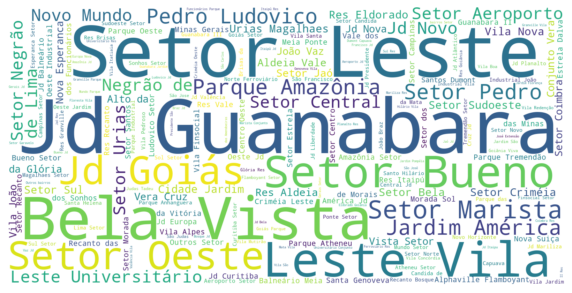

In [ ]:
# concatenar as palavras
all_summary = " ".join(s for s in lista_bairros)

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update([","])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# plt.imshow(wordcloud);
wordcloud.to_file("wordcloud.png")
wordcloud.to_file('/content/drive/My Drive/Colab Notebooks/covid/wordcloud.png')

In [ ]:
len(np.unique(bairros))

113

#Data scraping - novos casos diários
`Extração de dados dos Informes Epidemiológicos (PDFs) publicados no site da Prefeitura de Goiânia`

In [75]:
#acessa a pagina de informes
siteInformes = "https://saude.goiania.go.gov.br/goiania-contra-o-coronavirus/informe-epidemiologico-covid-19/#antigos"
#Consulta o site e retorne o html para a variável 'page'
page = urllib.request.urlopen(siteInformes)
#Parse o html na variável 'page' e armazene-o no formato BeautifulSoup
soup = BeautifulSoup(page, 'html5lib')

In [76]:
#pecorre cada linha do html de siteInformes e pegar os links dos pdfs
all_links = soup.find_all('a')
urls_pdfs = []
for link in all_links:
    if link.get('href'):
        if link.get('href')[-3:] == 'pdf':
            urls_pdfs.append(link.get('href'))
            
urls_pdfs

['https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-168-17.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-167-16.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-166-15.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-165-14.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-162-11.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-161-10.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-160-09.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-159-08.09.2020.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-158-07.09.2020-d.pdf',
 'https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no

In [77]:
len(urls_pdfs)

217

In [78]:
len(np.unique(urls_pdfs)) #deve ser igual o numero de informes publicados

166

In [79]:
#remove link duplicados
urls_pdfs = np.unique(urls_pdfs)

In [80]:
len(urls_pdfs)

166

In [81]:
#substitui alguns caracteres para evitar erros
urls_pdfs_modificadas = []
for url in urls_pdfs:
    new_link = url.replace('º', '%C2%BA')
    new_link1 = new_link.replace('padrão', 'padra%CC%83o')
    urls_pdfs_modificadas.append(new_link1)

#debug
i = 0
for i in range(len(urls_pdfs_modificadas)):
    print(i)
    print(urls_pdfs_modificadas[i])  

0
https://goiania.go.gov.br/sms/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-30-02.05.2020.pdf
1
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-1-03-04-2020.pdf
2
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-10-12.04.2020.pdf
3
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-11-13.04.2020.pdf
4
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-12-14.04.2020.pdf
5
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-13-15.04.2020-2.pdf
6
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-14-16.04.2020.pdf
7
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-15-17.04.2020_2.pdf
8
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-16-18.04.2020.pdf
9
https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/In

In [82]:
###############################################################
######### OBJETIVO: LER O HTML E EXTRAIR OS DADOS #############
###############################################################

num_informes = len(urls_pdfs) #quantidades de informes publicados
i = 0
j = 0
conteudos = []
dataset = {}

def pega_data(url):
    indice = 0
    while indice < len(url):
        if url[indice] == '2':
            if url[indice+1] == '0':
                if url[indice+2] == '2':
                    if url[indice+3] == '0':
                        if url[indice+4] != '/':
                            data = url[indice] + url[indice+1]+url[indice+2]+url[indice+3]+'-'+url[indice-3]+url[indice-2]+'-'+url[indice-6]+url[indice-5]
                            # print(data)
                            return data
                
        
        indice+=1

    return '0000-00-00'        

def pega_registo (registo):
    try:
        num = registo
        num = int(num)
        return num

    except ValueError as e:
        return 0


for url in urls_pdfs_modificadas:

    if i <= num_informes:
        num_inf = i
        print(i)
        i+=1
        conteudos.clear()
        conteudos.append(parser.from_file(url))
        time.sleep(8)

        #armazena o conteudo do pdf em conteudos_pdfs.txt (um pdf por vez)
        #repare no conteudos.clear() linhas acima
        arquivo = open('conteudos-pdfs.txt', 'w')
        for linha in conteudos:
            arquivo.write(linha['content']) 
        arquivo.close()

        #pega a data do informe
        data = pega_data(url)
        data = data[:10]
        print(data)

        #abre o arquivo e captura a data em que foi criado
        arquivo = open('conteudos-pdfs.txt', 'r')
        lista = arquivo.readlines()
        arquivo.close()

        df = pd.DataFrame(lista)
        delete_row = df[df[0]=='\n'].index
        df = df.drop(delete_row)
        df.reset_index(inplace=True)
        df.drop(columns=['index'], axis=1, inplace=True)

        row_iterator = df.iterrows()

        flag = 1
        while 1:
            try:
                for aux in range(len(df)):
                    linha_atual = next(row_iterator)
                    inicio = 'Goiânia'
                
                    if (inicio in linha_atual[1][0]) == True and len(linha_atual[1][0]) == 8:
                        print('ok')
                        while flag:
                            #cria um dicionario no formato bairro: num_casos
                            if ('confirmados' in linha_atual[1][0] or 'casos confirmados' in linha_atual[1][0]) and ('óbitos' in linha_atual[1][0]) == False:
                                linha = linha_atual[1][0].split(' ')[0].replace('.','').replace('*','')
                                reg = pega_registo(linha)
                                if reg != 0:
                                    print('ok2')
                                    num_casos = reg

                            if 'óbito' in linha_atual[1][0]:
                                linha = linha_atual[1][0].split(' ')[0].replace('.','').replace('*','')
                                reg = pega_registo(linha)
                                if reg != 0:
                                    print('ok3')
                                    num_obitos = reg
                                    dataset[j] = {'data': data, 'obitos': num_obitos, 'num_casos': num_casos}
                                    print(dataset[j])
                                    j+=1 
                                    flag=0

                            linha_atual = next(row_iterator)     



            except StopIteration as e:
                    print(e)
                    break
    else:
        i+=1




2020-09-18 05:16:17,120 [MainThread  ] [INFO ]  Retrieving https://goiania.go.gov.br/sms/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-30-02.05.2020.pdf to /tmp/sms-wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-30-02.05.2020.pdf.


0


2020-09-18 05:16:27,994 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-1-03-04-2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-1-03-04-2020.pdf.


2020-05-02
ok
ok2
ok3
{'data': '2020-05-02', 'obitos': 13, 'num_casos': 464}

1


2020-09-18 05:16:37,588 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-10-12.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-10-12.04.2020.pdf.


2020-04-03
ok
ok2
ok3
{'data': '2020-04-03', 'obitos': 1, 'num_casos': 61}

2


2020-09-18 05:16:47,152 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-11-13.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-11-13.04.2020.pdf.


2020-04-12
ok
ok2
ok3
{'data': '2020-04-12', 'obitos': 8, 'num_casos': 128}

3


2020-09-18 05:16:56,922 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-12-14.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-12-14.04.2020.pdf.


2020-04-13
ok
ok2
ok3
{'data': '2020-04-13', 'obitos': 8, 'num_casos': 160}

4


2020-09-18 05:17:06,540 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-13-15.04.2020-2.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-13-15.04.2020-2.pdf.


2020-04-14
ok
ok2
ok3
{'data': '2020-04-14', 'obitos': 7, 'num_casos': 159}

5


2020-09-18 05:17:15,976 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-14-16.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-14-16.04.2020.pdf.


2020-04-15
ok
ok2
ok3
{'data': '2020-04-15', 'obitos': 7, 'num_casos': 177}

6


2020-09-18 05:17:25,537 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-15-17.04.2020_2.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-15-17.04.2020_2.pdf.


2020-04-16
ok
ok2
ok3
{'data': '2020-04-16', 'obitos': 8, 'num_casos': 184}

7


2020-09-18 05:17:35,146 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-16-18.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-16-18.04.2020.pdf.


2020-04-17
ok
ok2
ok3
{'data': '2020-04-17', 'obitos': 9, 'num_casos': 195}

8


2020-09-18 05:17:44,748 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-17-19.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-17-19.04.2020.pdf.


2020-04-18
ok
ok2
ok3
{'data': '2020-04-18', 'obitos': 9, 'num_casos': 227}

9


2020-09-18 05:17:54,365 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-18-20.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-18-20.04.2020.pdf.


2020-04-19
ok
ok2
ok3
{'data': '2020-04-19', 'obitos': 10, 'num_casos': 231}

10


2020-09-18 05:18:03,958 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-19-21.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-19-21.04.2020.pdf.


2020-04-20
ok
ok2
ok3
{'data': '2020-04-20', 'obitos': 10, 'num_casos': 236}

11


2020-09-18 05:18:13,719 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-2-04.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-2-04.04.2020.pdf.


2020-04-21
ok
ok2
ok3
{'data': '2020-04-21', 'obitos': 10, 'num_casos': 241}

12


2020-09-18 05:18:23,289 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-20-22.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-20-22.04.2020.pdf.


2020-04-04
ok
ok2
ok3
{'data': '2020-04-04', 'obitos': 2, 'num_casos': 69}

13


2020-09-18 05:18:32,708 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-21-23.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-21-23.04.2020.pdf.


2020-04-22
ok
ok2
ok3
{'data': '2020-04-22', 'obitos': 10, 'num_casos': 256}

14


2020-09-18 05:18:42,174 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-22-24.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-22-24.04.2020.pdf.


2020-04-23
ok
ok2
ok3
{'data': '2020-04-23', 'obitos': 11, 'num_casos': 256}

15


2020-09-18 05:18:52,008 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-23-25.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-23-25.04.2020.pdf.


2020-04-24
ok
ok2
ok3
{'data': '2020-04-24', 'obitos': 11, 'num_casos': 273}

16


2020-09-18 05:19:01,808 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-24-26.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-24-26.04.2020.pdf.


2020-04-25
ok
ok2
ok3
{'data': '2020-04-25', 'obitos': 11, 'num_casos': 294}

17


2020-09-18 05:19:11,573 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-25-27.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-25-27.04.2020.pdf.


2020-04-26
ok
ok2
ok3
{'data': '2020-04-26', 'obitos': 11, 'num_casos': 346}

18


2020-09-18 05:19:21,395 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-26-28.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-26-28.04.2020.pdf.


2020-04-27
ok
ok2
ok3
{'data': '2020-04-27', 'obitos': 11, 'num_casos': 362}

19


2020-09-18 05:19:31,023 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-27-29.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-27-29.04.2020.pdf.


2020-04-28
ok
ok2
ok3
{'data': '2020-04-28', 'obitos': 11, 'num_casos': 394}

20


2020-09-18 05:19:40,681 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-28-30.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-28-30.04.2020.pdf.


2020-04-29
ok
ok2
ok3
{'data': '2020-04-29', 'obitos': 12, 'num_casos': 407}

21


2020-09-18 05:19:50,288 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-3-05.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-3-05.04.2020.pdf.


2020-04-30
ok
ok2
ok3
{'data': '2020-04-30', 'obitos': 12, 'num_casos': 448}

22


2020-09-18 05:19:59,684 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-4-06.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-4-06.04.2020.pdf.


2020-04-05
ok
ok2
ok3
{'data': '2020-04-05', 'obitos': 2, 'num_casos': 73}

23


2020-09-18 05:20:09,254 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-5-07.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-5-07.04.2020.pdf.


2020-04-06
ok
ok2
ok3
{'data': '2020-04-06', 'obitos': 4, 'num_casos': 73}

24


2020-09-18 05:20:18,489 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-6-08.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-6-08.04.2020.pdf.


2020-04-07
ok
ok2
ok3
{'data': '2020-04-07', 'obitos': 4, 'num_casos': 76}

25


2020-09-18 05:20:27,886 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-7-09.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-7-09.04.2020.pdf.


2020-04-08
ok
ok2
ok3
{'data': '2020-04-08', 'obitos': 5, 'num_casos': 86}

26


2020-09-18 05:20:37,340 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-8-10.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-8-10.04.2020.pdf.


2020-04-09
ok
ok2
ok3
{'data': '2020-04-09', 'obitos': 5, 'num_casos': 101}

27


2020-09-18 05:20:46,741 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/04/Informe-COVID-19-n%C2%BA-9-11.04.2020.pdf to /tmp/wp-uploads-sites-3-2020-04-informe-covid-19-n-c2-ba-9-11.04.2020.pdf.


2020-04-10
ok
ok2
ok3
{'data': '2020-04-10', 'obitos': 5, 'num_casos': 107}

28


2020-09-18 05:20:56,303 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-31-03.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-31-03.05.2020.pdf.


2020-04-11
ok
ok2
ok3
{'data': '2020-04-11', 'obitos': 6, 'num_casos': 115}

29


2020-09-18 05:21:06,798 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-39-11.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-39-11.05.2020.pdf.


2020-05-03
ok
ok2
ok3
{'data': '2020-05-03', 'obitos': 13, 'num_casos': 481}

30


2020-09-18 05:21:16,577 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-44-16.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-44-16.05.2020.pdf.


2020-05-11
ok
ok2
ok3
{'data': '2020-05-11', 'obitos': 22, 'num_casos': 736}

31


2020-09-18 05:21:26,069 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-45-17.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-45-17.05.2020.pdf.


2020-05-16
ok
ok2
ok3
{'data': '2020-05-16', 'obitos': 29, 'num_casos': 911}

32


2020-09-18 05:21:35,916 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-46-18.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-46-18.05.2020.pdf.


2020-05-17
ok
ok2
ok3
{'data': '2020-05-17', 'obitos': 29, 'num_casos': 983}

33


2020-09-18 05:21:45,746 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-49-21.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-49-21.05.2020.pdf.


2020-05-18
ok
ok2
ok3
{'data': '2020-05-18', 'obitos': 30, 'num_casos': 1021}

34


2020-09-18 05:21:55,568 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-29-01.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-29-01.05.2020.pdf.


2020-05-21
ok
ok2
ok3
{'data': '2020-05-21', 'obitos': 37, 'num_casos': 1150}

35


2020-09-18 05:22:05,048 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-32-04.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-32-04.05.2020.pdf.


2020-05-01
ok
ok2
ok3
{'data': '2020-05-01', 'obitos': 13, 'num_casos': 451}

36


2020-09-18 05:22:14,663 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-33-05.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-33-05.05.2020.pdf.


2020-05-04
ok
ok2
ok3
{'data': '2020-05-04', 'obitos': 13, 'num_casos': 503}

37


2020-09-18 05:22:25,302 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-34-06.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-34-06.05.2020.pdf.


2020-05-05
ok
ok2
ok3
{'data': '2020-05-05', 'obitos': 14, 'num_casos': 547}

38


2020-09-18 05:22:34,746 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-35-07.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-35-07.05.2020.pdf.


2020-05-06
ok
ok2
ok3
{'data': '2020-05-06', 'obitos': 20, 'num_casos': 560}

39


2020-09-18 05:22:44,568 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-36-08.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-36-08.05.2020.pdf.


2020-05-07
ok
ok2
ok3
{'data': '2020-05-07', 'obitos': 20, 'num_casos': 601}

40


2020-09-18 05:22:54,200 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-37-09.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-37-09.05.2020.pdf.


2020-05-08
ok
ok2
ok3
{'data': '2020-05-08', 'obitos': 21, 'num_casos': 659}

41


2020-09-18 05:23:03,843 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-38-10.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-38-10.05.2020.pdf.


2020-05-09
ok
ok2
ok3
{'data': '2020-05-09', 'obitos': 22, 'num_casos': 667}

42


2020-09-18 05:23:13,303 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-40-12.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-40-12.05.2020.pdf.


2020-05-10
ok
ok2
ok3
{'data': '2020-05-10', 'obitos': 22, 'num_casos': 693}

43


2020-09-18 05:23:23,079 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-41-13.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-41-13.05.2020.pdf.


2020-05-12
ok
ok2
ok3
{'data': '2020-05-12', 'obitos': 25, 'num_casos': 757}

44


2020-09-18 05:23:32,851 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-42-14.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-42-14.05.2020-1.pdf.


2020-05-13
ok
ok2
ok3
{'data': '2020-05-13', 'obitos': 30, 'num_casos': 802}

45


2020-09-18 05:23:42,473 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-43-15.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-43-15.05.2020.pdf.


2020-05-14
ok
ok2
ok3
{'data': '2020-05-14', 'obitos': 30, 'num_casos': 822}

46


2020-09-18 05:23:52,291 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-47-19.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-47-19.05.2020.pdf.


2020-05-15
ok
ok2
ok3
{'data': '2020-05-15', 'obitos': 29, 'num_casos': 904}

47


2020-09-18 05:24:03,121 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-48-20.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-48-20.05.2020.pdf.


2020-05-19
ok
ok2
ok3
{'data': '2020-05-19', 'obitos': 33, 'num_casos': 1066}

48


2020-09-18 05:24:12,567 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-50-22.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-50-22.05.2020.pdf.


2020-05-20
ok
ok2
ok3
{'data': '2020-05-20', 'obitos': 35, 'num_casos': 1133}

49


2020-09-18 05:24:22,255 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-51-23-05-2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-51-23-05-2020.pdf.


2020-05-22
ok
ok2
ok3
{'data': '2020-05-22', 'obitos': 39, 'num_casos': 1326}

50


2020-09-18 05:24:31,892 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-52-24-05-2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-52-24-05-2020.pdf.


2020-05-23
ok
ok2
ok3
{'data': '2020-05-23', 'obitos': 39, 'num_casos': 1376}

51


2020-09-18 05:24:41,692 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-53-25.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-53-25.05.2020-1.pdf.


2020-05-24
ok
ok2
ok3
{'data': '2020-05-24', 'obitos': 39, 'num_casos': 1416}

52


2020-09-18 05:24:51,535 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-54-26.05.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-54-26.05.2020-1.pdf.


2020-05-25
ok
ok2
ok3
{'data': '2020-05-25', 'obitos': 42, 'num_casos': 1435}

53


2020-09-18 05:25:01,347 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-55-27.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-55-27.05.2020.pdf.


2020-05-26
ok
ok2
ok3
{'data': '2020-05-26', 'obitos': 47, 'num_casos': 1532}

54


2020-09-18 05:25:11,225 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-56-28.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-56-28.05.2020.pdf.


2020-05-27
ok
ok2
ok3
{'data': '2020-05-27', 'obitos': 48, 'num_casos': 1616}

55


2020-09-18 05:25:21,096 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-57-29.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-57-29.05.2020.pdf.


2020-05-28
ok
ok2
ok3
{'data': '2020-05-28', 'obitos': 51, 'num_casos': 1708}

56


2020-09-18 05:25:31,110 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-58-30.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-58-30.05.2020.pdf.


2020-05-29
ok
ok2
ok3
{'data': '2020-05-29', 'obitos': 60, 'num_casos': 1761}

57


2020-09-18 05:25:40,963 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/05/Informe-COVID-19-n%C2%BA-59-31.05.2020.pdf to /tmp/wp-uploads-sites-3-2020-05-informe-covid-19-n-c2-ba-59-31.05.2020.pdf.


2020-05-30
ok
ok2
ok3
{'data': '2020-05-30', 'obitos': 60, 'num_casos': 1829}

58


2020-09-18 05:25:51,200 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-60-01.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-60-01.06.2020.pdf.


2020-05-31
ok
ok2
ok3
{'data': '2020-05-31', 'obitos': 60, 'num_casos': 1947}

59


2020-09-18 05:26:01,112 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-61-02.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-61-02.06.2020-1.pdf.


2020-06-01
ok
ok2
ok3
{'data': '2020-06-01', 'obitos': 63, 'num_casos': 1977}

60


2020-09-18 05:26:10,955 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-62-03.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-62-03.06.2020-1.pdf.


2020-06-02
ok
ok2
ok3
{'data': '2020-06-02', 'obitos': 72, 'num_casos': 2175}

61


2020-09-18 05:26:20,906 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-63-04.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-63-04.06.2020.pdf.


2020-06-03
ok
ok2
ok3
{'data': '2020-06-03', 'obitos': 74, 'num_casos': 2234}

62


2020-09-18 05:26:31,697 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-64-05.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-64-05.06.2020.pdf.


2020-06-04
ok
ok2
ok3
{'data': '2020-06-04', 'obitos': 75, 'num_casos': 2410}

63


2020-09-18 05:26:41,888 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-65-06.06.2020-.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-65-06.06.2020-.pdf.


2020-06-05
ok
ok2
ok3
{'data': '2020-06-05', 'obitos': 76, 'num_casos': 2560}

64


2020-09-18 05:26:51,903 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-66-07.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-66-07.06.2020.pdf.


2020-06-06
ok
ok2
ok3
{'data': '2020-06-06', 'obitos': 78, 'num_casos': 2572}

65


2020-09-18 05:27:01,500 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-67-08.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-67-08.06.2020.pdf.


2020-06-07
ok
ok2
ok3
{'data': '2020-06-07', 'obitos': 78, 'num_casos': 2596}

66


2020-09-18 05:27:11,498 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-68-09.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-68-09.06.2020.pdf.


2020-06-08
ok
ok2
ok3
{'data': '2020-06-08', 'obitos': 79, 'num_casos': 2624}

67


2020-09-18 05:27:21,617 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-69-10.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-69-10.06.2020.pdf.


2020-06-09
ok
ok2
ok3
{'data': '2020-06-09', 'obitos': 82, 'num_casos': 2922}

68


2020-09-18 05:27:31,403 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-70-11.06.2020-C.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-70-11.06.2020-c.pdf.


2020-06-10
ok
ok2
ok3
{'data': '2020-06-10', 'obitos': 85, 'num_casos': 2983}

69


2020-09-18 05:27:41,213 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-71-12.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-71-12.06.2020.pdf.


2020-06-11
ok
ok2
ok3
{'data': '2020-06-11', 'obitos': 85, 'num_casos': 3022}

70


2020-09-18 05:27:52,196 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-72-13.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-72-13.06.2020.pdf.


2020-06-12
ok
ok2
ok3
{'data': '2020-06-12', 'obitos': 86, 'num_casos': 3218}

71


2020-09-18 05:28:02,014 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-73-14.06.2020-modelo.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-73-14.06.2020-modelo.pdf.


2020-06-13
ok
ok2
ok3
{'data': '2020-06-13', 'obitos': 88, 'num_casos': 3229}

72


2020-09-18 05:28:14,678 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-74-15.06.2020-D4.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-74-15.06.2020-d4.pdf.


2020-06-14

73


2020-09-18 05:28:24,598 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-75-16.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-75-16.06.2020.pdf.


2020-06-15
ok
ok2
ok3
{'data': '2020-06-15', 'obitos': 99, 'num_casos': 3452}

74


2020-09-18 05:28:34,443 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-76-17.06.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-76-17.06.2020-1.pdf.


2020-06-16
ok
ok2
ok3
{'data': '2020-06-16', 'obitos': 99, 'num_casos': 3939}

75


2020-09-18 05:28:44,409 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-77-18.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-77-18.06.2020.pdf.


2020-06-17
ok
ok2
ok3
{'data': '2020-06-17', 'obitos': 99, 'num_casos': 4392}

76


2020-09-18 05:28:54,326 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-78-19.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-78-19.06.2020.pdf.


2020-06-18
ok
ok2
ok3
{'data': '2020-06-18', 'obitos': 100, 'num_casos': 4509}

77


2020-09-18 05:29:04,268 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-79-20.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-79-20.06.2020.pdf.


2020-06-19
ok
ok2
ok3
{'data': '2020-06-19', 'obitos': 107, 'num_casos': 4900}

78


2020-09-18 05:29:14,301 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-80-21.06.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-80-21.06.2020-padra-cc-83o.pdf.


2020-06-20
ok
ok2
ok3
{'data': '2020-06-20', 'obitos': 111, 'num_casos': 5035}

79


2020-09-18 05:29:23,965 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-81-22.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-81-22.06.2020.pdf.


2020-06-21
ok
ok2
ok3
{'data': '2020-06-21', 'obitos': 114, 'num_casos': 5275}

80


2020-09-18 05:29:33,929 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-82-23.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-82-23.06.2020.pdf.


2020-06-22
ok
ok2
ok3
{'data': '2020-06-22', 'obitos': 117, 'num_casos': 5463}

81


2020-09-18 05:29:43,800 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-83-24.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-83-24.06.2020.pdf.


2020-06-23
ok
ok2
ok3
{'data': '2020-06-23', 'obitos': 130, 'num_casos': 5561}

82


2020-09-18 05:29:54,756 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-84-25.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-84-25.06.2020.pdf.


2020-06-24
ok
ok2
ok3
{'data': '2020-06-24', 'obitos': 134, 'num_casos': 5957}

83


2020-09-18 05:30:04,430 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-85-26.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-85-26.06.2020.pdf.


2020-06-25
ok
ok2
ok3
{'data': '2020-06-25', 'obitos': 139, 'num_casos': 6225}

84


2020-09-18 05:30:14,520 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-86-27.06.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-86-27.06.2020-padra-cc-83o.pdf.


2020-06-26
ok
ok2
ok3
{'data': '2020-06-26', 'obitos': 149, 'num_casos': 6298}

85


2020-09-18 05:30:25,412 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-87-28.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-87-28.06.2020.pdf.


2020-06-27
ok
ok2
ok3
{'data': '2020-06-27', 'obitos': 153, 'num_casos': 6350}

86


2020-09-18 05:30:35,079 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-88-29.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-88-29.06.2020.pdf.


2020-06-28
ok
ok2
ok3
{'data': '2020-06-28', 'obitos': 154, 'num_casos': 6367}

87


2020-09-18 05:30:44,852 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/06/Informe-COVID-19-n%C2%BA-89-30.06.2020.pdf to /tmp/wp-uploads-sites-3-2020-06-informe-covid-19-n-c2-ba-89-30.06.2020.pdf.


2020-06-29
ok
ok2
ok3
{'data': '2020-06-29', 'obitos': 155, 'num_casos': 6748}

88


2020-09-18 05:30:54,860 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-100-11.07.2020-padra%CC%83o-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-100-11.07.2020-padra-cc-83o-1.pdf.


2020-06-30
ok
ok2
ok3
{'data': '2020-06-30', 'obitos': 164, 'num_casos': 6837}

89


2020-09-18 05:31:23,470 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-101-12.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-101-12.07.2020-1.pdf.


2020-07-11
ok
ok2
ok3
{'data': '2020-07-11', 'obitos': 266, 'num_casos': 9394}

90


2020-09-18 05:31:34,600 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-102-13.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-102-13.07.2020.pdf.


2020-07-12
ok
ok2
ok3
{'data': '2020-07-12', 'obitos': 267, 'num_casos': 9777}

91


2020-09-18 05:31:44,421 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-103-14.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-103-14.07.2020.pdf.


2020-07-13
ok
ok2
ok3
{'data': '2020-07-13', 'obitos': 272, 'num_casos': 9810}

92


2020-09-18 05:31:54,519 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-104-15.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-104-15.07.2020.pdf.


2020-07-14
ok
ok2
ok3
{'data': '2020-07-14', 'obitos': 273, 'num_casos': 10158}

93


2020-09-18 05:32:04,608 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-105-16.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-105-16.07.2020.pdf.


2020-07-15
ok
ok2
ok3
{'data': '2020-07-15', 'obitos': 280, 'num_casos': 10442}

94


2020-09-18 05:32:14,582 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-106-17.07.2020-b.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-106-17.07.2020-b.pdf.


2020-07-16
ok
ok2
ok3
{'data': '2020-07-16', 'obitos': 297, 'num_casos': 10530}

95


2020-09-18 05:32:25,575 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-107-18.07.2020-b.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-107-18.07.2020-b.pdf.


2020-07-17
ok
ok2
ok3
{'data': '2020-07-17', 'obitos': 307, 'num_casos': 10808}

96


2020-09-18 05:32:35,202 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-108-19.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-108-19.07.2020-c.pdf.


2020-07-18
ok
ok2
ok3
{'data': '2020-07-18', 'obitos': 310, 'num_casos': 10839}

97


2020-09-18 05:32:45,333 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-109-20.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-109-20.07.2020-c.pdf.


2020-07-19
ok
ok2
ok3
{'data': '2020-07-19', 'obitos': 311, 'num_casos': 10840}

98


2020-09-18 05:32:55,204 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-110-21.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-110-21.07.2020.pdf.


2020-07-20
ok
ok2
ok3
{'data': '2020-07-20', 'obitos': 324, 'num_casos': 10872}

99


2020-09-18 05:33:05,038 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-111-22.07.2020d.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-111-22.07.2020d.pdf.


2020-07-21
ok
ok2
ok3
{'data': '2020-07-21', 'obitos': 329, 'num_casos': 10998}

100


2020-09-18 05:33:15,013 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-112-23.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-112-23.07.2020.pdf.


2020-07-22
ok
ok2
ok3
{'data': '2020-07-22', 'obitos': 346, 'num_casos': 12303}

101


2020-09-18 05:33:25,005 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-113-24.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-113-24.07.2020.pdf.


2020-07-23
ok
ok2
ok3
{'data': '2020-07-23', 'obitos': 378, 'num_casos': 13034}

102


2020-09-18 05:33:35,024 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-114-25.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-114-25.07.2020.pdf.


2020-07-24
ok
ok2
ok3
{'data': '2020-07-24', 'obitos': 398, 'num_casos': 13529}

103


2020-09-18 05:33:45,064 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-115-26.07.2020-c.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-115-26.07.2020-c.pdf.


2020-07-25
ok
ok2
ok3
{'data': '2020-07-25', 'obitos': 411, 'num_casos': 13571}

104


2020-09-18 05:33:56,964 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-116-27.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-116-27.07.2020.pdf.


2020-07-26
ok
ok2
ok3
{'data': '2020-07-26', 'obitos': 414, 'num_casos': 13887}

105


2020-09-18 05:34:06,708 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-117-28.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-117-28.07.2020.pdf.


2020-07-27
ok
ok2
ok3
{'data': '2020-07-27', 'obitos': 419, 'num_casos': 14648}

106


2020-09-18 05:34:16,604 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-118-29.07.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-118-29.07.2020-d.pdf.


2020-07-28
ok
ok2
ok3
{'data': '2020-07-28', 'obitos': 429, 'num_casos': 15411}

107


2020-09-18 05:34:26,382 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-119-30.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-119-30.07.2020-1.pdf.


2020-07-29
ok
ok2
ok3
{'data': '2020-07-29', 'obitos': 441, 'num_casos': 16018}

108


2020-09-18 05:34:36,362 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-120-31.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-120-31.07.2020.pdf.


2020-07-30
ok
ok2
ok3
{'data': '2020-07-30', 'obitos': 447, 'num_casos': 16732}

109


2020-09-18 05:34:46,401 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-90-01.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-90-01.07.2020.pdf.


2020-07-31
ok
ok2
ok3
{'data': '2020-07-31', 'obitos': 480, 'num_casos': 17422}

110


2020-09-18 05:34:56,106 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-91-02.07.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-91-02.07.2020-1.pdf.


2020-07-01
ok
ok2
ok3
{'data': '2020-07-01', 'obitos': 169, 'num_casos': 6983}

111


2020-09-18 05:35:05,918 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-92-03.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-92-03.07.2020.pdf.


2020-07-02
ok
ok2
ok3
{'data': '2020-07-02', 'obitos': 180, 'num_casos': 7349}

112


2020-09-18 05:35:15,699 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-93-04.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-93-04.07.2020.pdf.


2020-07-03
ok
ok2
ok3
{'data': '2020-07-03', 'obitos': 195, 'num_casos': 7725}

113


2020-09-18 05:35:25,848 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-94-05.07.2020-padra%CC%83o.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-94-05.07.2020-padra-cc-83o.pdf.


2020-07-04
ok
ok2
ok3
{'data': '2020-07-04', 'obitos': 199, 'num_casos': 7770}

114


2020-09-18 05:35:36,932 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-95-06.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-95-06.07.2020.pdf.


2020-07-05
ok
ok2
ok3
{'data': '2020-07-05', 'obitos': 199, 'num_casos': 7792}

115


2020-09-18 05:35:46,941 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-96-07.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-96-07.07.2020.pdf.


2020-07-06
ok
ok2
ok3
{'data': '2020-07-06', 'obitos': 207, 'num_casos': 8143}

116


2020-09-18 05:35:57,053 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-97-08.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-97-08.07.2020.pdf.


2020-07-07
ok
ok2
ok3
{'data': '2020-07-07', 'obitos': 229, 'num_casos': 8491}

117


2020-09-18 05:36:06,832 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-98-09.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-98-09.07.2020.pdf.


2020-07-08
ok
ok2
ok3
{'data': '2020-07-08', 'obitos': 239, 'num_casos': 8831}

118


2020-09-18 05:36:16,498 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/07/Informe-COVID-19-n%C2%BA-99-10.07.2020.pdf to /tmp/wp-uploads-sites-3-2020-07-informe-covid-19-n-c2-ba-99-10.07.2020.pdf.


2020-07-09
ok
ok2
ok3
{'data': '2020-07-09', 'obitos': 251, 'num_casos': 9057}

119


2020-09-18 05:36:26,285 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-145-25.08.2020-2.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-145-25.08.2020-2.pdf.


2020-07-10
ok
ok2
ok3
{'data': '2020-07-10', 'obitos': 264, 'num_casos': 9363}

120


2020-09-18 05:36:36,260 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-146-26.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-146-26.08.2020.pdf.


2020-08-25
ok
ok2
ok3
{'data': '2020-08-25', 'obitos': 821, 'num_casos': 31508}

121


2020-09-18 05:36:46,384 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-147-27.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-147-27.08.2020.pdf.


2020-08-26
ok
ok2
ok3
{'data': '2020-08-26', 'obitos': 848, 'num_casos': 31954}

122


2020-09-18 05:36:56,027 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-148-28.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-148-28.08.2020.pdf.


2020-08-27
ok
ok2
ok3
{'data': '2020-08-27', 'obitos': 875, 'num_casos': 32994}

123


2020-09-18 05:37:05,873 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-149-29.08.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-149-29.08.2020-d.pdf.


2020-08-28
ok
ok2
ok3
{'data': '2020-08-28', 'obitos': 886, 'num_casos': 33342}

124


2020-09-18 05:37:18,218 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-150-30.08.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-150-30.08.2020-d.pdf.


2020-08-29
ok
ok2
ok3
{'data': '2020-08-29', 'obitos': 903, 'num_casos': 33718}

125


2020-09-18 05:37:30,371 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-no-151-31.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-no-151-31.08.2020.pdf.


2020-08-30
ok
ok2
ok3
{'data': '2020-08-30', 'obitos': 903, 'num_casos': 33853}

126


2020-09-18 05:37:40,356 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-121-01.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-121-01.08.2020.pdf.


2020-08-31
ok
ok2
ok3
{'data': '2020-08-31', 'obitos': 906, 'num_casos': 34002}

127


2020-09-18 05:37:50,207 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-122-02.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-122-02.08.2020.pdf.


2020-08-01
ok
ok2
ok3
{'data': '2020-08-01', 'obitos': 489, 'num_casos': 17733}

128


2020-09-18 05:38:00,664 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-123-03.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-123-03.08.2020.pdf.


2020-08-02
ok
ok2
ok3
{'data': '2020-08-02', 'obitos': 489, 'num_casos': 17745}

129


2020-09-18 05:38:11,039 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-124-04.08.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-124-04.08.2020-1.pdf.


2020-08-03
ok
ok2
ok3
{'data': '2020-08-03', 'obitos': 495, 'num_casos': 17799}

130


2020-09-18 05:38:21,671 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-125-05.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-125-05.08.2020.pdf.


2020-08-04
ok
ok2
ok3
{'data': '2020-08-04', 'obitos': 510, 'num_casos': 18289}

131


2020-09-18 05:38:31,957 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-126-06.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-126-06.08.2020.pdf.


2020-08-05
ok
ok2
ok3
{'data': '2020-08-05', 'obitos': 523, 'num_casos': 19428}

132


2020-09-18 05:38:42,642 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-127-07.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-127-07.08.2020.pdf.


2020-08-06
ok
ok2
ok3
{'data': '2020-08-06', 'obitos': 541, 'num_casos': 20535}

133


2020-09-18 05:38:52,934 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-128-08.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-128-08.08.2020.pdf.


2020-08-07
ok
ok2
ok3
{'data': '2020-08-07', 'obitos': 543, 'num_casos': 21254}

134


2020-09-18 05:39:03,084 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-129-09.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-129-09.08.2020.pdf.


2020-08-08
ok
ok2
ok3
{'data': '2020-08-08', 'obitos': 546, 'num_casos': 21820}

135


2020-09-18 05:39:13,210 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-130-10.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-130-10.08.2020.pdf.


2020-08-09
ok
ok2
ok3
{'data': '2020-08-09', 'obitos': 546, 'num_casos': 22009}

136


2020-09-18 05:39:23,637 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-131-11.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-131-11.08.2020.pdf.


2020-08-10
ok
ok2
ok3
{'data': '2020-08-10', 'obitos': 553, 'num_casos': 22305}

137


2020-09-18 05:39:34,105 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-132-12.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-132-12.08.2020.pdf.


2020-08-11
ok
ok2
ok3
{'data': '2020-08-11', 'obitos': 570, 'num_casos': 22745}

138


2020-09-18 05:39:44,540 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-133-13.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-133-13.08.2020.pdf.


2020-08-12
ok
ok2
ok3
{'data': '2020-08-12', 'obitos': 590, 'num_casos': 23441}

139


2020-09-18 05:39:55,055 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-134-14.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-134-14.08.2020.pdf.


2020-08-13
ok
ok2
ok3
{'data': '2020-08-13', 'obitos': 612, 'num_casos': 24883}

140


2020-09-18 05:40:05,690 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-135-15.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-135-15.08.2020.pdf.


2020-08-14
ok
ok2
ok3
{'data': '2020-08-14', 'obitos': 612, 'num_casos': 25420}

141


2020-09-18 05:40:20,101 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-136-16.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-136-16.08.2020.pdf.


2020-08-15
ok
ok2
ok3
{'data': '2020-08-15', 'obitos': 646, 'num_casos': 25598}

142


2020-09-18 05:40:35,711 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-137-17.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-137-17.08.2020.pdf.


2020-08-16
ok
ok2
ok3
{'data': '2020-08-16', 'obitos': 646, 'num_casos': 25816}

143


2020-09-18 05:40:46,256 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-138-18.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-138-18.08.2020.pdf.


2020-08-17
ok
ok2
ok3
{'data': '2020-08-17', 'obitos': 652, 'num_casos': 26869}

144


2020-09-18 05:40:56,693 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-139-19.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-139-19.08.2020.pdf.


2020-08-18
ok
ok2
ok3
{'data': '2020-08-18', 'obitos': 685, 'num_casos': 27765}

145


2020-09-18 05:41:07,383 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-140-20.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-140-20.08.2020.pdf.


2020-08-19
ok
ok2
ok3
{'data': '2020-08-19', 'obitos': 696, 'num_casos': 28603}

146


2020-09-18 05:41:18,137 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-141-21.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-141-21.08.2020.pdf.


2020-08-20
ok
ok2
ok3
{'data': '2020-08-20', 'obitos': 757, 'num_casos': 28650}

147


2020-09-18 05:41:28,763 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-142-22.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-142-22.08.2020.pdf.


2020-08-21
ok
ok2
ok3
{'data': '2020-08-21', 'obitos': 777, 'num_casos': 29503}

148


2020-09-18 05:41:39,583 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-143-23.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-143-23.08.2020.pdf.


2020-08-22
ok
ok2
ok3
{'data': '2020-08-22', 'obitos': 790, 'num_casos': 29917}

149


2020-09-18 05:41:50,085 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/08/Informe-COVID-19-n%C2%BA-144-24.08.2020.pdf to /tmp/wp-uploads-sites-3-2020-08-informe-covid-19-n-c2-ba-144-24.08.2020.pdf.


2020-08-23
ok
ok2
ok3
{'data': '2020-08-23', 'obitos': 797, 'num_casos': 30671}

150


2020-09-18 05:42:00,546 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-152-01.09.2020-1.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-152-01.09.2020-1.pdf.


2020-08-24
ok
ok2
ok3
{'data': '2020-08-24', 'obitos': 802, 'num_casos': 30930}

151


2020-09-18 05:42:11,174 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-153-02.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-153-02.09.2020.pdf.


2020-09-01
ok
ok2
ok3
{'data': '2020-09-01', 'obitos': 933, 'num_casos': 34750}

152


2020-09-18 05:42:21,929 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-154-03.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-154-03.09.2020.pdf.


2020-09-02
ok
ok2
ok3
{'data': '2020-09-02', 'obitos': 945, 'num_casos': 35291}

153


2020-09-18 05:42:32,233 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-155-04.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-155-04.09.2020.pdf.


2020-09-03
ok
ok2
ok3
{'data': '2020-09-03', 'obitos': 962, 'num_casos': 36292}

154


2020-09-18 05:42:42,682 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-156-05.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-156-05.09.2020.pdf.


2020-09-04
ok
ok2
ok3
{'data': '2020-09-04', 'obitos': 977, 'num_casos': 36757}

155


2020-09-18 05:42:53,144 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-157-06.09.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-157-06.09.2020-d.pdf.


2020-09-05
ok
ok2
ok3
{'data': '2020-09-05', 'obitos': 982, 'num_casos': 37529}

156


2020-09-18 05:43:03,263 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-158-07.09.2020-d.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-158-07.09.2020-d.pdf.


2020-09-06
ok
ok2
ok3
{'data': '2020-09-06', 'obitos': 985, 'num_casos': 38129}

157


2020-09-18 05:43:13,388 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-159-08.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-159-08.09.2020.pdf.


2020-09-07
ok
ok2
ok3
{'data': '2020-09-07', 'obitos': 987, 'num_casos': 38181}

158


2020-09-18 05:43:23,944 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-160-09.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-160-09.09.2020.pdf.


2020-09-08
ok
ok2
ok3
{'data': '2020-09-08', 'obitos': 991, 'num_casos': 38521}

159


2020-09-18 05:43:34,218 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-161-10.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-161-10.09.2020.pdf.


2020-09-09
ok
ok2
ok3
{'data': '2020-09-09', 'obitos': 1022, 'num_casos': 38890}

160


2020-09-18 05:43:44,887 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-162-11.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-162-11.09.2020.pdf.


2020-09-10
ok
ok2
ok3
{'data': '2020-09-10', 'obitos': 1050, 'num_casos': 40142}

161


2020-09-18 05:43:55,452 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-165-14.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-165-14.09.2020.pdf.


2020-09-11
ok
ok2
ok3
{'data': '2020-09-11', 'obitos': 1069, 'num_casos': 41116}

162


2020-09-18 05:44:06,235 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-166-15.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-166-15.09.2020.pdf.


2020-09-14
ok
ok2
ok3
{'data': '2020-09-14', 'obitos': 1094, 'num_casos': 43564}

163


2020-09-18 05:44:16,996 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-167-16.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-167-16.09.2020.pdf.


2020-09-15
ok
ok2
ok3
{'data': '2020-09-15', 'obitos': 1114, 'num_casos': 45438}

164


2020-09-18 05:44:27,789 [MainThread  ] [INFO ]  Retrieving https://saude.goiania.go.gov.br/wp-uploads/sites/3/2020/09/Informe-COVID-19-no-168-17.09.2020.pdf to /tmp/wp-uploads-sites-3-2020-09-informe-covid-19-no-168-17.09.2020.pdf.


2020-09-16
ok
ok2
ok3
{'data': '2020-09-16', 'obitos': 1127, 'num_casos': 46645}

165
2020-09-17
ok
ok2
ok3
{'data': '2020-09-17', 'obitos': 1163, 'num_casos': 48529}



In [95]:
#adcionar 13/09 e 12/09 (a prefeitura disponibilizou os dados em jpeg)
# 13 09 2020 41956 1075
# 12 09 2020 1072 41692

dataset= {0: {'data': '2020-05-02', 'num_casos': 464, 'obitos': 13},
 1: {'data': '2020-04-03', 'num_casos': 61, 'obitos': 1},
 2: {'data': '2020-04-12', 'num_casos': 128, 'obitos': 8},
 3: {'data': '2020-04-13', 'num_casos': 160, 'obitos': 8},
 4: {'data': '2020-04-14', 'num_casos': 159, 'obitos': 7},
 5: {'data': '2020-04-15', 'num_casos': 177, 'obitos': 7},
 6: {'data': '2020-04-16', 'num_casos': 184, 'obitos': 8},
 7: {'data': '2020-04-17', 'num_casos': 195, 'obitos': 9},
 8: {'data': '2020-04-18', 'num_casos': 227, 'obitos': 9},
 9: {'data': '2020-04-19', 'num_casos': 231, 'obitos': 10},
 10: {'data': '2020-04-20', 'num_casos': 236, 'obitos': 10},
 11: {'data': '2020-04-21', 'num_casos': 241, 'obitos': 10},
 12: {'data': '2020-04-04', 'num_casos': 69, 'obitos': 2},
 13: {'data': '2020-04-22', 'num_casos': 256, 'obitos': 10},
 14: {'data': '2020-04-23', 'num_casos': 256, 'obitos': 11},
 15: {'data': '2020-04-24', 'num_casos': 273, 'obitos': 11},
 16: {'data': '2020-04-25', 'num_casos': 294, 'obitos': 11},
 17: {'data': '2020-04-26', 'num_casos': 346, 'obitos': 11},
 18: {'data': '2020-04-27', 'num_casos': 362, 'obitos': 11},
 19: {'data': '2020-04-28', 'num_casos': 394, 'obitos': 11},
 20: {'data': '2020-04-29', 'num_casos': 407, 'obitos': 12},
 21: {'data': '2020-04-30', 'num_casos': 448, 'obitos': 12},
 22: {'data': '2020-04-05', 'num_casos': 73, 'obitos': 2},
 23: {'data': '2020-04-06', 'num_casos': 73, 'obitos': 4},
 24: {'data': '2020-04-07', 'num_casos': 76, 'obitos': 4},
 25: {'data': '2020-04-08', 'num_casos': 86, 'obitos': 5},
 26: {'data': '2020-04-09', 'num_casos': 101, 'obitos': 5},
 27: {'data': '2020-04-10', 'num_casos': 107, 'obitos': 5},
 28: {'data': '2020-04-11', 'num_casos': 115, 'obitos': 6},
 29: {'data': '2020-05-03', 'num_casos': 481, 'obitos': 13},
 30: {'data': '2020-05-11', 'num_casos': 736, 'obitos': 22},
 31: {'data': '2020-05-16', 'num_casos': 911, 'obitos': 29},
 32: {'data': '2020-05-17', 'num_casos': 983, 'obitos': 29},
 33: {'data': '2020-05-18', 'num_casos': 1021, 'obitos': 30},
 34: {'data': '2020-05-21', 'num_casos': 1150, 'obitos': 37},
 35: {'data': '2020-05-01', 'num_casos': 451, 'obitos': 13},
 36: {'data': '2020-05-04', 'num_casos': 503, 'obitos': 13},
 37: {'data': '2020-05-05', 'num_casos': 547, 'obitos': 14},
 38: {'data': '2020-05-06', 'num_casos': 560, 'obitos': 20},
 39: {'data': '2020-05-07', 'num_casos': 601, 'obitos': 20},
 40: {'data': '2020-05-08', 'num_casos': 659, 'obitos': 21},
 41: {'data': '2020-05-09', 'num_casos': 667, 'obitos': 22},
 42: {'data': '2020-05-10', 'num_casos': 693, 'obitos': 22},
 43: {'data': '2020-05-12', 'num_casos': 757, 'obitos': 25},
 44: {'data': '2020-05-13', 'num_casos': 802, 'obitos': 30},
 45: {'data': '2020-05-14', 'num_casos': 822, 'obitos': 30},
 46: {'data': '2020-05-15', 'num_casos': 904, 'obitos': 29},
 47: {'data': '2020-05-19', 'num_casos': 1066, 'obitos': 33},
 48: {'data': '2020-05-20', 'num_casos': 1133, 'obitos': 35},
 49: {'data': '2020-05-22', 'num_casos': 1326, 'obitos': 39},
 50: {'data': '2020-05-23', 'num_casos': 1376, 'obitos': 39},
 51: {'data': '2020-05-24', 'num_casos': 1416, 'obitos': 39},
 52: {'data': '2020-05-25', 'num_casos': 1435, 'obitos': 42},
 53: {'data': '2020-05-26', 'num_casos': 1532, 'obitos': 47},
 54: {'data': '2020-05-27', 'num_casos': 1616, 'obitos': 48},
 55: {'data': '2020-05-28', 'num_casos': 1708, 'obitos': 51},
 56: {'data': '2020-05-29', 'num_casos': 1761, 'obitos': 60},
 57: {'data': '2020-05-30', 'num_casos': 1829, 'obitos': 60},
 58: {'data': '2020-05-31', 'num_casos': 1947, 'obitos': 60},
 59: {'data': '2020-06-01', 'num_casos': 1977, 'obitos': 63},
 60: {'data': '2020-06-02', 'num_casos': 2175, 'obitos': 72},
 61: {'data': '2020-06-03', 'num_casos': 2234, 'obitos': 74},
 62: {'data': '2020-06-04', 'num_casos': 2410, 'obitos': 75},
 63: {'data': '2020-06-05', 'num_casos': 2560, 'obitos': 76},
 64: {'data': '2020-06-06', 'num_casos': 2572, 'obitos': 78},
 65: {'data': '2020-06-07', 'num_casos': 2596, 'obitos': 78},
 66: {'data': '2020-06-08', 'num_casos': 2624, 'obitos': 79},
 67: {'data': '2020-06-09', 'num_casos': 2922, 'obitos': 82},
 68: {'data': '2020-06-10', 'num_casos': 2983, 'obitos': 85},
 69: {'data': '2020-06-11', 'num_casos': 3022, 'obitos': 85},
 70: {'data': '2020-06-12', 'num_casos': 3218, 'obitos': 86},
 71: {'data': '2020-06-13', 'num_casos': 3229, 'obitos': 88},
 72: {'data': '2020-06-15', 'num_casos': 3452, 'obitos': 99},
 73: {'data': '2020-06-16', 'num_casos': 3939, 'obitos': 99},
 74: {'data': '2020-06-17', 'num_casos': 4392, 'obitos': 99},
 75: {'data': '2020-06-18', 'num_casos': 4509, 'obitos': 100},
 76: {'data': '2020-06-19', 'num_casos': 4900, 'obitos': 107},
 77: {'data': '2020-06-20', 'num_casos': 5035, 'obitos': 111},
 78: {'data': '2020-06-21', 'num_casos': 5275, 'obitos': 114},
 79: {'data': '2020-06-22', 'num_casos': 5463, 'obitos': 117},
 80: {'data': '2020-06-23', 'num_casos': 5561, 'obitos': 130},
 81: {'data': '2020-06-24', 'num_casos': 5957, 'obitos': 134},
 82: {'data': '2020-06-25', 'num_casos': 6225, 'obitos': 139},
 83: {'data': '2020-06-26', 'num_casos': 6298, 'obitos': 149},
 84: {'data': '2020-06-27', 'num_casos': 6350, 'obitos': 153},
 85: {'data': '2020-06-28', 'num_casos': 6367, 'obitos': 154},
 86: {'data': '2020-06-29', 'num_casos': 6748, 'obitos': 155},
 87: {'data': '2020-06-30', 'num_casos': 6837, 'obitos': 164},
 88: {'data': '2020-07-11', 'num_casos': 9394, 'obitos': 266},
 89: {'data': '2020-07-12', 'num_casos': 9777, 'obitos': 267},
 90: {'data': '2020-07-13', 'num_casos': 9810, 'obitos': 272},
 91: {'data': '2020-07-14', 'num_casos': 10158, 'obitos': 273},
 92: {'data': '2020-07-15', 'num_casos': 10442, 'obitos': 280},
 93: {'data': '2020-07-16', 'num_casos': 10530, 'obitos': 297},
 94: {'data': '2020-07-17', 'num_casos': 10808, 'obitos': 307},
 95: {'data': '2020-07-18', 'num_casos': 10839, 'obitos': 310},
 96: {'data': '2020-07-19', 'num_casos': 10840, 'obitos': 311},
 97: {'data': '2020-07-20', 'num_casos': 10872, 'obitos': 324},
 98: {'data': '2020-07-21', 'num_casos': 10998, 'obitos': 329},
 99: {'data': '2020-07-22', 'num_casos': 12303, 'obitos': 346},
 100: {'data': '2020-07-23', 'num_casos': 13034, 'obitos': 378},
 101: {'data': '2020-07-24', 'num_casos': 13529, 'obitos': 398},
 102: {'data': '2020-07-25', 'num_casos': 13571, 'obitos': 411},
 103: {'data': '2020-07-26', 'num_casos': 13887, 'obitos': 414},
 104: {'data': '2020-07-27', 'num_casos': 14648, 'obitos': 419},
 105: {'data': '2020-07-28', 'num_casos': 15411, 'obitos': 429},
 106: {'data': '2020-07-29', 'num_casos': 16018, 'obitos': 441},
 107: {'data': '2020-07-30', 'num_casos': 16732, 'obitos': 447},
 108: {'data': '2020-07-31', 'num_casos': 17422, 'obitos': 480},
 109: {'data': '2020-07-01', 'num_casos': 6983, 'obitos': 169},
 110: {'data': '2020-07-02', 'num_casos': 7349, 'obitos': 180},
 111: {'data': '2020-07-03', 'num_casos': 7725, 'obitos': 195},
 112: {'data': '2020-07-04', 'num_casos': 7770, 'obitos': 199},
 113: {'data': '2020-07-05', 'num_casos': 7792, 'obitos': 199},
 114: {'data': '2020-07-06', 'num_casos': 8143, 'obitos': 207},
 115: {'data': '2020-07-07', 'num_casos': 8491, 'obitos': 229},
 116: {'data': '2020-07-08', 'num_casos': 8831, 'obitos': 239},
 117: {'data': '2020-07-09', 'num_casos': 9057, 'obitos': 251},
 118: {'data': '2020-07-10', 'num_casos': 9363, 'obitos': 264},
 119: {'data': '2020-08-25', 'num_casos': 31508, 'obitos': 821},
 120: {'data': '2020-08-26', 'num_casos': 31954, 'obitos': 848},
 121: {'data': '2020-08-27', 'num_casos': 32994, 'obitos': 875},
 122: {'data': '2020-08-28', 'num_casos': 33342, 'obitos': 886},
 123: {'data': '2020-08-29', 'num_casos': 33718, 'obitos': 903},
 124: {'data': '2020-08-30', 'num_casos': 33853, 'obitos': 903},
 125: {'data': '2020-08-31', 'num_casos': 34002, 'obitos': 906},
 126: {'data': '2020-08-01', 'num_casos': 17733, 'obitos': 489},
 127: {'data': '2020-08-02', 'num_casos': 17745, 'obitos': 489},
 128: {'data': '2020-08-03', 'num_casos': 17799, 'obitos': 495},
 129: {'data': '2020-08-04', 'num_casos': 18289, 'obitos': 510},
 130: {'data': '2020-08-05', 'num_casos': 19428, 'obitos': 523},
 131: {'data': '2020-08-06', 'num_casos': 20535, 'obitos': 541},
 132: {'data': '2020-08-07', 'num_casos': 21254, 'obitos': 543},
 133: {'data': '2020-08-08', 'num_casos': 21820, 'obitos': 546},
 134: {'data': '2020-08-09', 'num_casos': 22009, 'obitos': 546},
 135: {'data': '2020-08-10', 'num_casos': 22305, 'obitos': 553},
 136: {'data': '2020-08-11', 'num_casos': 22745, 'obitos': 570},
 137: {'data': '2020-08-12', 'num_casos': 23441, 'obitos': 590},
 138: {'data': '2020-08-13', 'num_casos': 24883, 'obitos': 612},
 139: {'data': '2020-08-14', 'num_casos': 25420, 'obitos': 612},
 140: {'data': '2020-08-15', 'num_casos': 25598, 'obitos': 646},
 141: {'data': '2020-08-16', 'num_casos': 25816, 'obitos': 646},
 142: {'data': '2020-08-17', 'num_casos': 26869, 'obitos': 652},
 143: {'data': '2020-08-18', 'num_casos': 27765, 'obitos': 685},
 144: {'data': '2020-08-19', 'num_casos': 28603, 'obitos': 696},
 145: {'data': '2020-08-20', 'num_casos': 28650, 'obitos': 757},
 146: {'data': '2020-08-21', 'num_casos': 29503, 'obitos': 777},
 147: {'data': '2020-08-22', 'num_casos': 29917, 'obitos': 790},
 148: {'data': '2020-08-23', 'num_casos': 30671, 'obitos': 797},
 149: {'data': '2020-08-24', 'num_casos': 30930, 'obitos': 802},
 150: {'data': '2020-09-01', 'num_casos': 34750, 'obitos': 933},
 151: {'data': '2020-09-02', 'num_casos': 35291, 'obitos': 945},
 152: {'data': '2020-09-03', 'num_casos': 36292, 'obitos': 962},
 153: {'data': '2020-09-04', 'num_casos': 36757, 'obitos': 977},
 154: {'data': '2020-09-05', 'num_casos': 37529, 'obitos': 982},
 155: {'data': '2020-09-06', 'num_casos': 38129, 'obitos': 985},
 156: {'data': '2020-09-07', 'num_casos': 38181, 'obitos': 987},
 157: {'data': '2020-09-08', 'num_casos': 38521, 'obitos': 991},
 158: {'data': '2020-09-09', 'num_casos': 38890, 'obitos': 1022},
 159: {'data': '2020-09-10', 'num_casos': 40142, 'obitos': 1050},
 160: {'data': '2020-09-11', 'num_casos': 41116, 'obitos': 1069},
 161: {'data': '2020-09-12', 'num_casos': 41692, 'obitos': 1072},
 162: {'data': '2020-09-13', 'num_casos': 41956, 'obitos': 1075},
 163: {'data': '2020-09-14', 'num_casos': 43564, 'obitos': 1094},
 164: {'data': '2020-09-15', 'num_casos': 45438, 'obitos': 1114},
 165: {'data': '2020-09-16', 'num_casos': 46645, 'obitos': 1127},
 166: {'data': '2020-09-17', 'obitos': 1163, 'num_casos': 48529}}

In [96]:
df_casos_por_dia = pd.DataFrame(data=dataset)
df_casos_por_dia = df_casos_por_dia.T
df_casos_por_dia

data num_casos obitos
0    2020-05-02       464     13
1    2020-04-03        61      1
2    2020-04-12       128      8
3    2020-04-13       160      8
4    2020-04-14       159      7
..          ...       ...    ...
162  2020-09-13     41956   1075
163  2020-09-14     43564   1094
164  2020-09-15     45438   1114
165  2020-09-16     46645   1127
166  2020-09-17     48529   1163

[167 rows x 3 columns]

In [97]:
df_casos_por_dia.to_csv('casos_e_obitos_por_dia.csv', index=False)

# Calcula a quantidade de novos registros de obitos e casos confirmados por dia desde abril

In [98]:
df_casos_por_dia = pd.read_csv('casos_e_obitos_por_dia.csv', sep=',')
df_casos_por_dia

data  num_casos  obitos
0    2020-05-02        464      13
1    2020-04-03         61       1
2    2020-04-12        128       8
3    2020-04-13        160       8
4    2020-04-14        159       7
..          ...        ...     ...
162  2020-09-13      41956    1075
163  2020-09-14      43564    1094
164  2020-09-15      45438    1114
165  2020-09-16      46645    1127
166  2020-09-17      48529    1163

[167 rows x 3 columns]

In [99]:

#converte as datas para datetime
df_casos_por_dia['data'] = pd.to_datetime(df_casos_por_dia['data'])

#ordena pela data e salva em um novo dataframe
df_casos_por_dia = df_casos_por_dia.sort_values(by='data')
df_casos_por_dia.reset_index(inplace = True)
df_casos_por_dia

index       data  num_casos  obitos
0        1 2020-04-03         61       1
1       12 2020-04-04         69       2
2       22 2020-04-05         73       2
3       23 2020-04-06         73       4
4       24 2020-04-07         76       4
..     ...        ...        ...     ...
162    162 2020-09-13      41956    1075
163    163 2020-09-14      43564    1094
164    164 2020-09-15      45438    1114
165    165 2020-09-16      46645    1127
166    166 2020-09-17      48529    1163

[167 rows x 4 columns]

In [100]:
df_casos_por_dia.to_csv('casos_e_obitos_por_dia.csv', index=False)

In [104]:
covid_gyn_por_dia = []
j = 0
num_casos = df_casos_por_dia['num_casos'][j] 
num_obitos = df_casos_por_dia['obitos'][j] 

covid_gyn_por_dia.append({'data': df_casos_por_dia['data'][j], 
                                'casos': num_casos,
                                'obitos': num_obitos})
j+=1

for i in range(len(df_casos_por_dia)):
    
    if j <= 166:
        num_casos = df_casos_por_dia['num_casos'][j] - df_casos_por_dia['num_casos'][j-1] 
        num_obitos = df_casos_por_dia['obitos'][j] - df_casos_por_dia['obitos'][j-1] 

        if num_casos < 0:
            i = j-1
            while 1: 
                aux = covid_gyn_por_dia[i]['casos'] - (num_casos*(-1))
                if aux < 0:
                    i-=1
                
                if aux > 0:
                    covid_gyn_por_dia[i]['casos'] = aux
                    num_casos = 0
                    break

        if num_obitos < 0:
            i = j-1
            while 1: 
                aux = covid_gyn_por_dia[i]['obitos'] - (num_obitos*(-1))
                if aux < 0:
                    i-=1
                
                if aux > 0:
                    covid_gyn_por_dia[i]['obitos'] = aux
                    num_obitos = 0
                    break



        covid_gyn_por_dia.append({'data': df_casos_por_dia['data'][j], 
                                    'casos': num_casos,
                                    'obitos': num_obitos})
        
        j+=1



In [105]:
covid_gyn_por_dia

[{'casos': 61, 'data': Timestamp('2020-04-03 00:00:00'), 'obitos': 1},
 {'casos': 8, 'data': Timestamp('2020-04-04 00:00:00'), 'obitos': 1},
 {'casos': 4, 'data': Timestamp('2020-04-05 00:00:00'), 'obitos': 0},
 {'casos': 0, 'data': Timestamp('2020-04-06 00:00:00'), 'obitos': 2},
 {'casos': 3, 'data': Timestamp('2020-04-07 00:00:00'), 'obitos': 0},
 {'casos': 10, 'data': Timestamp('2020-04-08 00:00:00'), 'obitos': 1},
 {'casos': 15, 'data': Timestamp('2020-04-09 00:00:00'), 'obitos': 0},
 {'casos': 6, 'data': Timestamp('2020-04-10 00:00:00'), 'obitos': 0},
 {'casos': 8, 'data': Timestamp('2020-04-11 00:00:00'), 'obitos': 1},
 {'casos': 13, 'data': Timestamp('2020-04-12 00:00:00'), 'obitos': 1},
 {'casos': 31, 'data': Timestamp('2020-04-13 00:00:00'), 'obitos': 0},
 {'casos': 0, 'data': Timestamp('2020-04-14 00:00:00'), 'obitos': 0},
 {'casos': 18, 'data': Timestamp('2020-04-15 00:00:00'), 'obitos': 0},
 {'casos': 7, 'data': Timestamp('2020-04-16 00:00:00'), 'obitos': 1},
 {'casos': 11,

In [106]:
df_novos_registros_por_dia = pd.DataFrame(data=covid_gyn_por_dia)
df_novos_registros_por_dia.to_csv('novos_registros_por_dia.csv', index=False)
df_novos_registros_por_dia

data  casos  obitos
0   2020-04-03     61       1
1   2020-04-04      8       1
2   2020-04-05      4       0
3   2020-04-06      0       2
4   2020-04-07      3       0
..         ...    ...     ...
162 2020-09-13    264       3
163 2020-09-14   1608      19
164 2020-09-15   1874      20
165 2020-09-16   1207      13
166 2020-09-17   1884      36

[167 rows x 3 columns]

In [107]:
#validacao
print(sum(df_novos_registros_por_dia.casos))
print(sum(df_novos_registros_por_dia.obitos))


48529
1163


# Gráfico de barras - novos registros por dia

In [108]:
fig = px.bar(df_novos_registros_por_dia, x='data', y='casos', color='casos', 
             labels={'casos':'Número de casos confirmados'},)
# fig.update_traces()
fig.update(layout_coloraxis_showscale=False)
# fig.update_traces(marker_showscale=False)


In [109]:
fig = px.bar(df_novos_registros_por_dia, x='data', y='obitos', color='obitos',
            labels={'obitos':'Número de óbitos', 'data': 'Data'})
fig.update_traces()
